# **Time Series Forecasting Tutorial**
## **Data Analysis**

![Image](https://www.ufv.ca/media/2015/headers/programs/arts/Economics-Banner-Image.jpg)

[Image Credit](https://www.ufv.ca/media/2015/headers/programs/arts/Economics-Banner-Image.jpg)<br>

This tutorial mainly focuses on the methods widely used to fit models on time series data and provide forecasts for future. This notebook performs the data analysis step, as the first step of time series forecasting, for three preselected time series.
Let's start it with some basic definitions. <br>

### **What is Forecasting?**
According to [Forecasting: Principles and Practice](https://otexts.com/fpp3/planning.html), forecasting is about predicting the future as accurately as possible, given all of the information available, including historical data and knowledge of any future events that might impact the forecasts.

### **What are the applications of forecasting?**
Forecasting has so many applications in real world. Some of these applications mentioned by [wikipedia](https://en.wikipedia.org/wiki/Forecasting) are:
- Economic forecasting
- Energy forecasting for renewable power integration
- Land use forecasting
- Player and team performance in sports
- Political forecasting
- Product forecasting
- Sales forecasting
- Technology forecasting
- Telecommunications forecasting
- Transport planning and forecasting
- Weather forecasting, flood forecasting and meteorology

#### **What is time series?**
According to [Forecasting: Principles and Practice](https://otexts.com/fpp3/planning.html), anything that is observed sequentially over time is a time series.

#### **What are the patterns in time series?**
According to [Forecasting: Principles and Practice](https://otexts.com/fpp3/planning.html), are usually formed by the following patterns: <br>
**Trend:** <br>
 A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend. There is a trend in the antidiabetic drug sales data shown in Figure 2.2.<br>
**Seasonal:**<br>
 A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known period. The monthly sales of antidiabetic drugs (Figure 2.2) shows seasonality which is induced partly by the change in the cost of the drugs at the end of the calendar year.<br>
**Cyclic:**<br>
 A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years.<br>
 What distinguishes cyclic behavior from seasonality is that cycles are not necessarily time dependent, as seasons are. What happens in a cycle is less about the particular date of occurence, and more about what has happened in the recent past. The (at least relative) independence from time means that cyclic behavior can be much more irregular than seasonality. [[ref]](https://www.kaggle.com/code/ryanholbrook/time-series-as-features)

 This notebook includes the following sections: <br>
[1. Quick Look at Data](#c1) <br>
---- [1.1. Datasets](#c1) <br>
---- [1.2. Visualizing data](#c2) <br>
---- [1.3. Checking some statistics](#c3) <br>
---- [1.4. Train-Test splitting](#c4) <br>
[2. More Visualizations](#c5) <br>
---- [2.1. Seasonal Plots](#c5) <br>
---- [2.2. Seasonal Subseries Plots](#c6) <br>
---- [2.3. Periodogram](#c7) <br>
---- [2.4. Lag Plots](#c8) <br>
---- [2.5. Autocorrelation Plots](#c9) <br>
[3. Time Series Decomposition](#c10) <br>
[4. Classical Decomposition](#c11) <br>
[5. STL Decomposition](#c12) <br>
---- [5.1. Time Series Decomposition](#c12) <br>
---- [5.2. Trend and Seasonality Strengths](#c13) <br>





In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots. matplotlib.pyplot plots are given a theme.
import statsmodels.api as sm

%matplotlib inline

#### **Datasets used in this tutorial:**
The datasets have been already extracted.

**Dataset 1:** The monthly data of 'New Privately-Owned Housing Units Started: Total Units' available [here](https://fred.stlouisfed.org/series/HOUSTNSA). <br>
**Dataset 2:** The daily data of `DELI` sales for store number 1 from the 'Store Sales - Time Series Forecasting' on Kaggle website available [here](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/code?competitionId=29781&sortBy=voteCount) <br>
**Dataset 3:** The daily data of the logarithem ([check why](https://otexts.com/fpp3/transformations.html)) of the Bitcoin 'Close' price extracted from the 'Yahoo Finance' repository.


In [2]:
data1 = pd.read_csv('HOUSTNSA.csv', parse_dates=['date'], index_col='date')
data2 = pd.read_csv('StoreSales.csv', parse_dates=['date'], index_col='date')
data3 = pd.read_csv('BTCLog.csv', parse_dates=['date'], index_col='date')

<a id='c1'></a>
## **1. Quick Look at Data:**
#### **1.1 Datasets:** 


In [3]:
print(data1.head())
print('--'*20)
print(data2.head())
print('--'*20)
print(data3.head())

               ts
date             
1959-01-01   96.2
1959-02-01   99.0
1959-03-01  127.7
1959-04-01  150.8
1959-05-01  152.5
----------------------------------------
                 ts
date               
2013-01-01    0.000
2013-01-02  164.069
2013-01-03  151.582
2013-01-04  131.411
2013-01-05  118.613
----------------------------------------
                  ts
date                
2015-01-01  5.750186
2015-01-02  5.752674
2015-01-03  5.638646
2015-01-04  5.576687
2015-01-05  5.614857


We check the data type and length of each dataset to make sure they are correct.

In [4]:
# checking data types
print(data1.info())
print('--'*20)
print(data2.info())
print('--'*20)
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 768 entries, 1959-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts      768 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts      1684 non-null   float64
dtypes: float64(1)
memory usage: 26.3 KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2770 entries, 2015-01-01 to 2022-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts      2770 non-null   float64
dtypes: float64(1)
memory usage: 43.3 KB
None


**NOTE: A very important step when dealing with time series data is to determine the frequency of the dataframe. It helps to reveal missing data points and is a must in the case of some functions.**

In [5]:
# set frequency
data1 = data1.asfreq('MS') # monthly
data2 = data2.asfreq('D') # daily
data3 = data3.asfreq('D') # daily

We now check for the missing values:

In [6]:
# Checking for missing values
print(data1.isnull().sum())
print('--'*20)
print(data2.isnull().sum())
print('--'*20)
print(data3.isnull().sum())

ts    0
dtype: int64
----------------------------------------
ts    4
dtype: int64
----------------------------------------
ts    0
dtype: int64


Only dataset 2 (store sale) has missing values.

In [7]:
# show missing values
data2[data2.isnull().sum(axis=1) > 0]

ts
date          
2013-12-25 NaN
2014-12-25 NaN
2015-12-25 NaN
2016-12-25 NaN

We see that the missing values belong to a specific day (25th of December) of each year. Here, we simply assume these values to be zero (if the store was closed).

In [8]:
# silling missing values with zero
data2 = data2.fillna(0)

# checking for missing values again
data2.isnull().sum()

ts    0
dtype: int64

<a id='c2'></a>
#### **1.2 Visualizing data:**
We visualize each column to get a general understanding of the data.

**1.2.1 Time Plots:** <br>
Let's start with line plots as it is always the first choice for time series data.

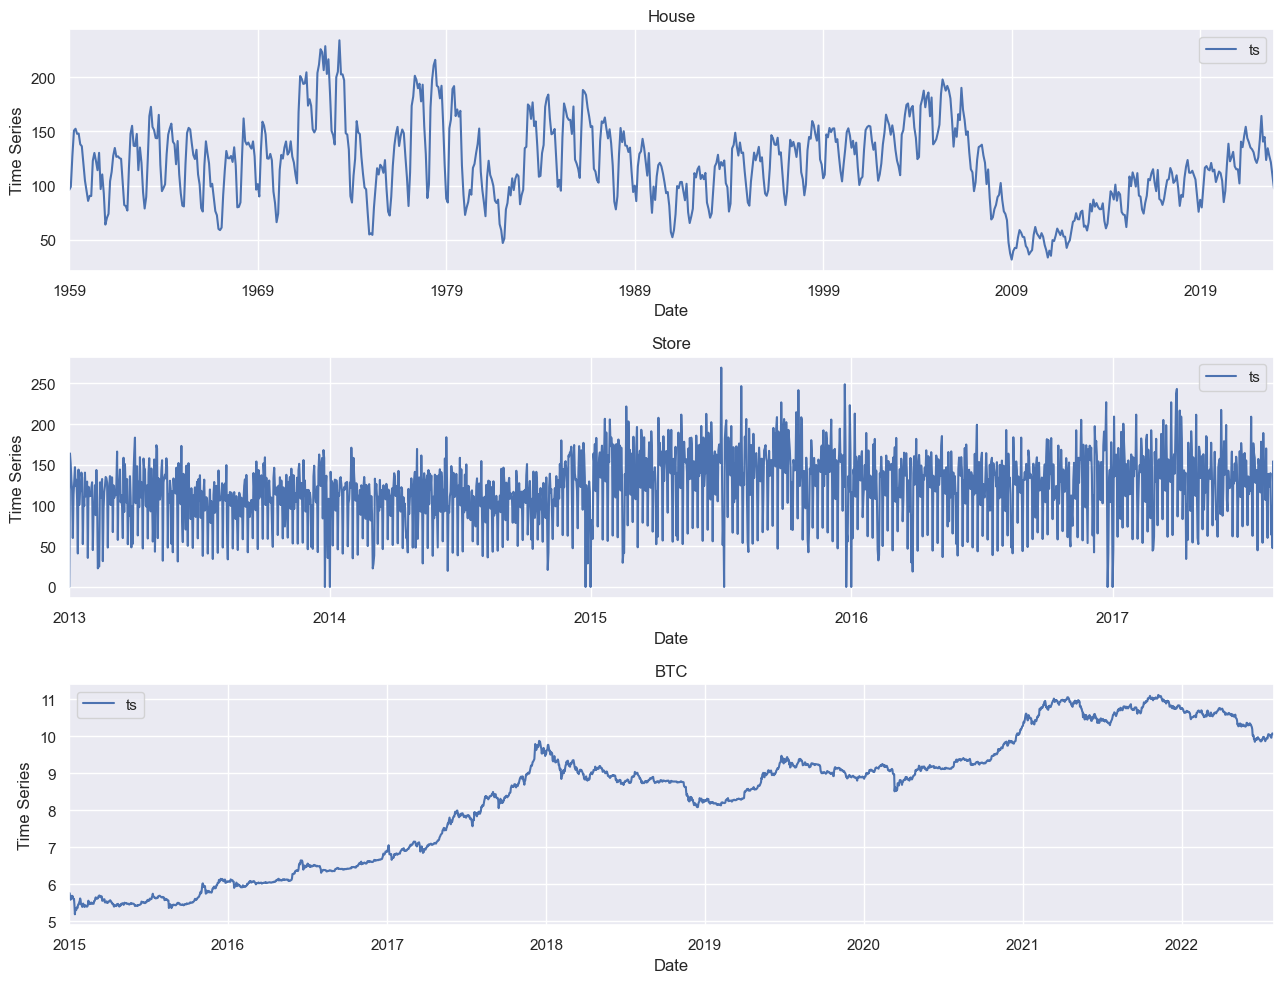

In [9]:
# plotting the data for each item
fig, ax = plt.subplots(3, 1, figsize=(13, 10))
data1.plot(ax=ax[0], title='House') 
data2.plot(ax=ax[1], title='Store') 
data3.plot(ax=ax[2], title='BTC') 
for i in range(3):
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Time Series')
plt.tight_layout()

We can extract good insights from the time plots.
* `data1`: It has obvious annual seasonality and cyclic patterns but it seems that there is no trend.
* `data2`: There is a small positive trend, probably weekly seasonality, and no obvious cyclic patterns.
* `data3`: There is a considerable positive trend, cyclic patterns, no obvious seasonality.

**1.2.2 Box Plots:** <br>
We also visualize the box plots for the sales of each month. This shows the volatility of the sales in each month.

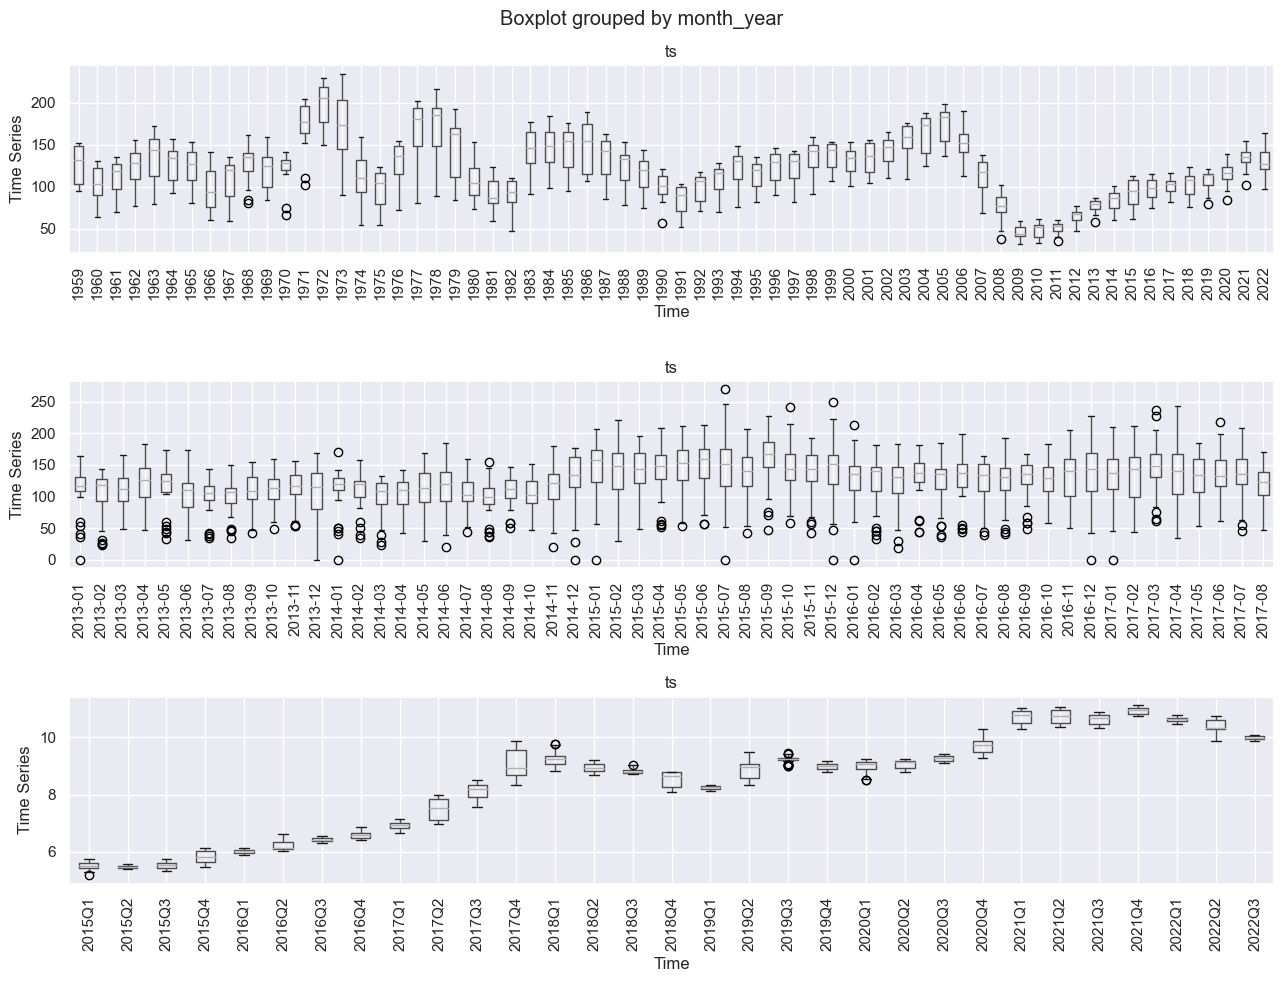

In [10]:
# adding a new column for month_year and year
data1['year'] = data1.index.to_period('Y') # yearly
data2['month_year'] = data2.index.to_period('M') # monthly
data3['month_year'] = data3.index.to_period('Q') # quarterly

# plotting the data for each item
fig, axes = plt.subplots(3, 1, figsize=(13, 10))
data1.boxplot(column='ts', by='year', ax=axes[0])
data2.boxplot(column='ts', by='month_year', ax=axes[1])
data3.boxplot(column='ts', by='month_year', ax=axes[2])
for i in range(3):
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Time Series')
    # rotate x-axis labels
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

# removing the month_year column
data1.drop('year', axis=1, inplace=True)
data2.drop('month_year', axis=1, inplace=True)
data3.drop('month_year', axis=1, inplace=True)

**1.2.3 Histogram and Density Plots:** <br>
Here, we take a look at the distribution of the sales for each item. Using these plots, we can identify which values occur more frequently than others, but we will ignore the factor of time. <br><br>
Note: Here, we use sns.distplot because it produces the plots as we need without changing arguments. However, this function has been deprecated and using sns.displot or sns.histplot are recommended. Hence, we here ignore the errors related to this using the following code:

In [11]:
import warnings
warnings.filterwarnings('ignore')

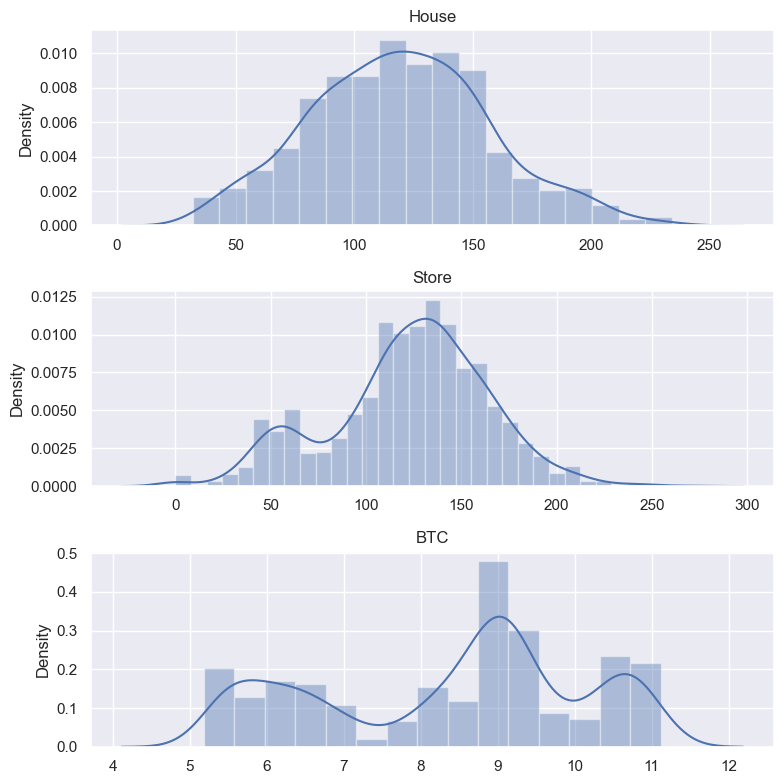

In [12]:
# disribution and density curves of sales for each item by sns
fig, axes = plt.subplots(3, 1, figsize=(8, 8))
sns.distplot(data1, ax=axes[0], kde=True)
sns.distplot(data2, ax=axes[1], kde=True)
sns.distplot(data3, ax=axes[2], kde=True)
axes[0].set_title('House')
axes[1].set_title('Store')
axes[2].set_title('BTC')
plt.tight_layout()

As can be seen, `data1` has a normal distribution with a mean value of about 120 and `data2` and `data3` have bi-modal and multi-modal distributions with 140 and 9 as the most frequent values. 

<a id='c3'></a>
#### **1.3 Checking some statistics:**

In [13]:
_ = pd.concat((data1.describe().round(2), data2.describe().round(2), data3.describe().round(2)), axis=1)
_.columns = ['House', 'Store', 'BTC']
_

House    Store      BTC
count  768.00  1688.00  2770.00
mean   119.43   122.65     8.39
std     37.74    41.55     1.73
min     31.90     0.00     5.18
25%     92.72   100.57     6.62
50%    118.90   127.30     8.84
75%    144.20   150.44     9.45
max    234.00   269.45    11.12

<a id='c4'></a>
#### **1.4 Train-Test splitting:**
At this point, we split the data to train and test sets. We build the models using the train set and make forecasts on the test set. In most of the data science problems, we first shuffle data and then select the train and test sets since these problems are not time-dependent. Hence, the time series data are splitted linearly without shuffling.<br>
Here, we use the first 80% of the data as train set and the last 20% as the test set.

In [14]:
n1 = len(data1)
train1 = data1.iloc[:int(0.8*n1)]
test1 = data1.iloc[int(0.8*n1):]

n2 = len(data2)
train2 = data2.iloc[:int(0.8*n2)]
test2 = data2.iloc[int(0.8*n2):]

n3 = len(data3)
train3 = data3.iloc[:int(0.8*n3)]
test3 = data3.iloc[int(0.8*n3):]

# checking the shape of train and test
train1.shape, test1.shape, train2.shape, test2.shape, train3.shape, test3.shape

((614, 1), (154, 1), (1350, 1), (338, 1), (2216, 1), (554, 1))

From now on, we apply all analysis and modeling to the train set and only make forecasts on the test set.

<a id='c5'></a>
## **2. More Visualizations**
Here, we provide more visualizations on the train sets.

#### **2.1 Seasonal Plots:**
A seasonal plot allows the underlying seasonal pattern to be seen more clearly, and is especially useful in identifying periods in which the pattern changes. [[ref]](https://otexts.com/fpp3/seasonal-plots.html)

Note: A time series can have multiple seasonalities.

In [15]:
# These functions are provided in [1]
def summarize(gb, f):
    """Summarize grouped things."""
    return gb.apply(lambda x: pd.Series(f(x)))

def seasonalize(data, column, period='year'):
    if period.lower() in ('year', 'y'):
        d = data.assign(
            __period = data.index.year,
            __x = data.index.dayofyear)
    elif period.lower() in ('month', 'm'):
        d = data.assign(
            __period = 100*data.index.year + data.index.month,
            __x = data.index.day)
    elif period.lower() in ('week', 'w'):
        d = data.assign(
            __period = 100*data.index.year + data.index.week,
            __x = data.index.dayofweek
                + (data.index.hour + data.index.minute/60 + data.index.second/3600) / 24)
    elif period.lower() in ('day', 'd'):
        d = data.assign(
            __period = data.index.date,
            __x = data.index.hour + data.index.minute/60 + data.index.second/3600)
    d = (
        d
        .sort_values('__x')
        .groupby('__period')
        .pipe(summarize, lambda x: {'time': list(x.__x), column: list(x[column])})
    )
    return d

def plot_seasonal(
        data, column,
        period='year',
        cmap='viridis',
        labels='',
        figsize=None,
        ax=None,
        **kw):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = ax.figure, ax
    d = seasonalize(data, column, period)
    cm = plt.get_cmap(cmap)
    for (i, p) in enumerate(d.index):
        color = cm(i / len(d))
        x, y = d.time.loc[p], d[column].loc[p]
        ax.plot(x, y, color=color, label=str(p), **kw)
        if labels in 'right both'.split():
            ax.text(x[-1], y[-1], str(p), color=color, ha='center', va='center')
        if labels in 'left both'.split():
            ax.text(x[0], y[0], str(p), color=color, ha='center', va='center')
    return ax

**`train1` >> Since the data is monthly, we can only try yearly seasonal plot.**

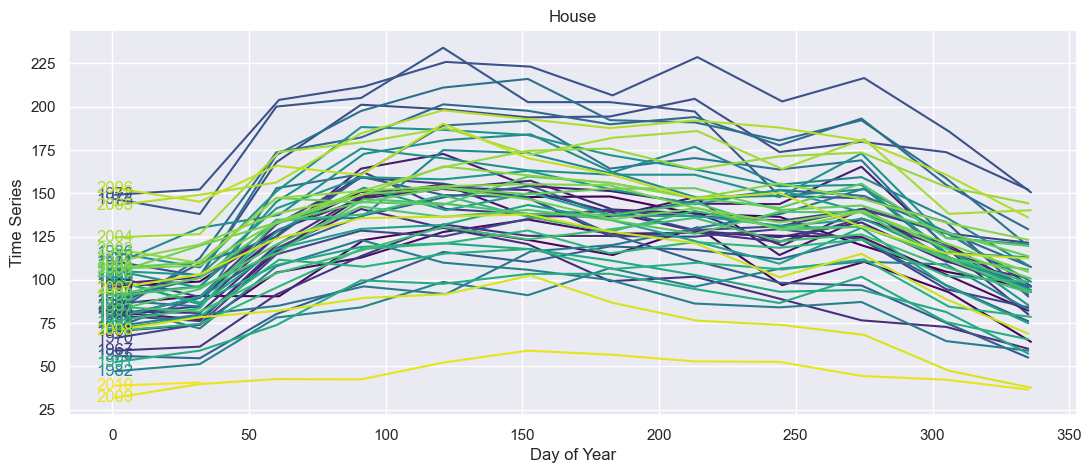

In [16]:
# seasonal plot for train1 with yearly seasonality
ax = plot_seasonal(train1, 'ts', period='year', labels='left', figsize=(13,5))
ax.set(xlabel='Day of Year', ylabel='Time Series', title='House')
plt.show()

The yearly seasonality is very obvious in the plot above. We can see that the time series start with smaller values at the begining of the year. Then, the values go up at the middle of each year. Finally, the values go down again at the end of the year.

**`train2` >> Since the data is daily, we can try annual, monthly, and weekly seasonal plots.**

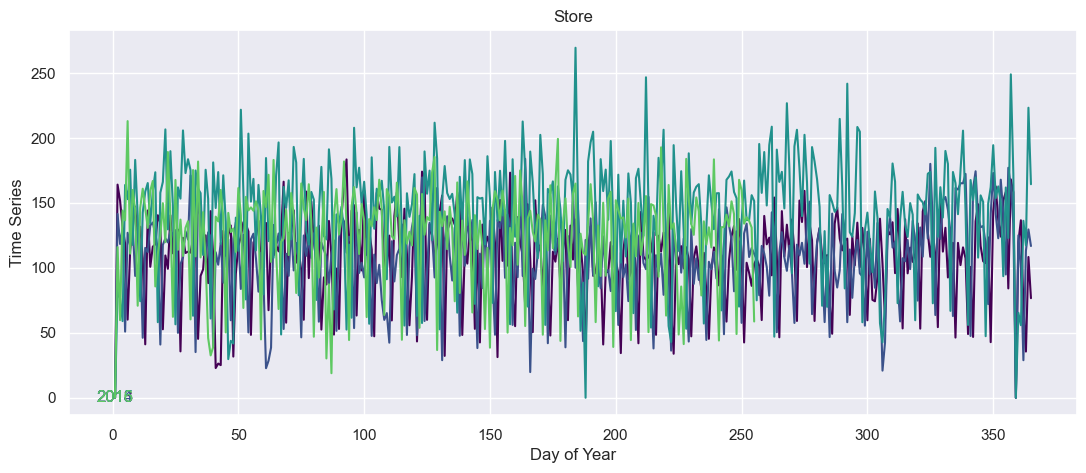

In [17]:
# seasonal plot for train2 with yearly seasonality
ax = plot_seasonal(train2, 'ts', period='year', labels='left', figsize=(13,5))
ax.set(xlabel='Day of Year', ylabel='Time Series', title='Store')
plt.show()

The yearly seasonality is not very strong and hence, we ignore it.

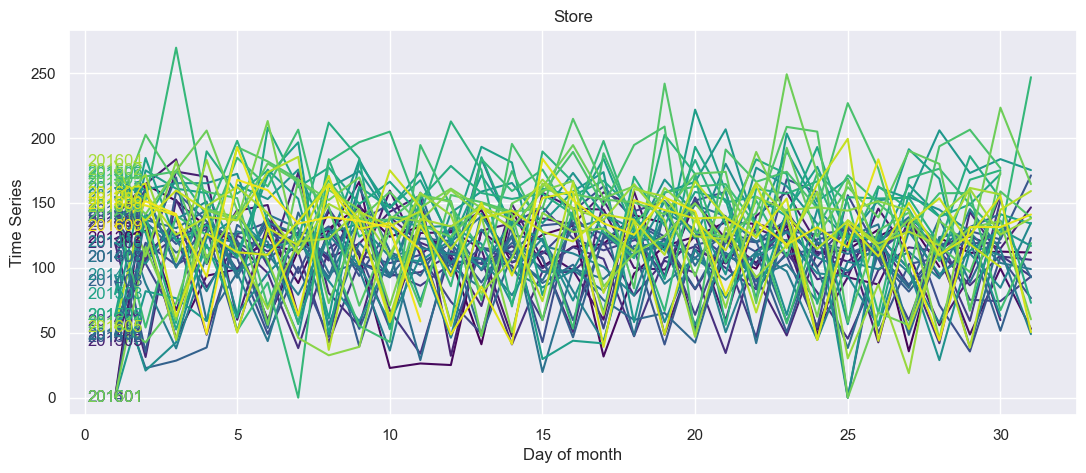

In [18]:
# seasonal plot for train2 with monthly seasonality
ax = plot_seasonal(train2, 'ts', period='month', labels='left', figsize=(13,5))
ax.set(xlabel='Day of month', ylabel='Time Series', title='Store')
plt.show()

We can certainly say there is no monthly seasonality in `train2`.

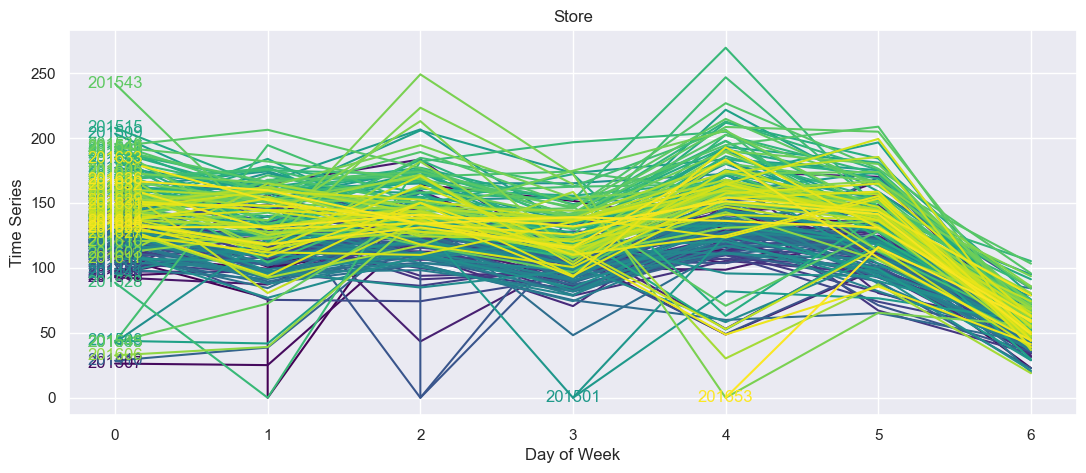

In [19]:
# seasonal plot for train2 with weekly seasonality
ax = plot_seasonal(train2, 'ts', period='week', labels='left', figsize=(13,5))
ax.set(xlabel='Day of Week', ylabel='Time Series', title='Store')
plt.show()

The weekly seasonality is much stronger in `train2` and we count on it. As we can see, the values of the time series (store sales) are relatively larger on the third and fifth days of the week and considerably drop at the last day of the week.

**`train3` >> Since the data is daily, we can try annual, monthly, and weekly seasonal plots.**

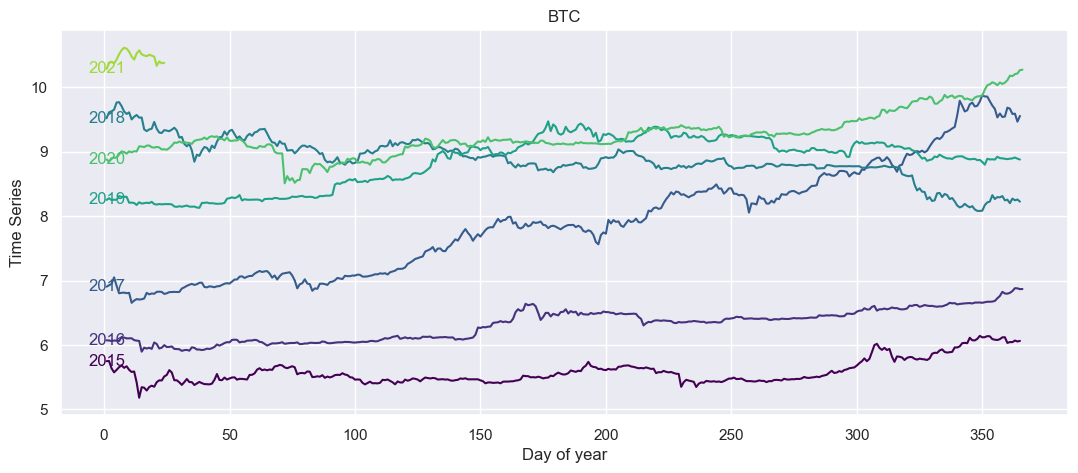

In [20]:
# seasonal plot for train3 with yearly seasonality
ax = plot_seasonal(train3, 'ts', period='year', labels='left', figsize=(13,5))
ax.set(xlabel='Day of year', ylabel='Time Series', title='BTC')
plt.show()

The yearly seasonality is not strong in the time series.

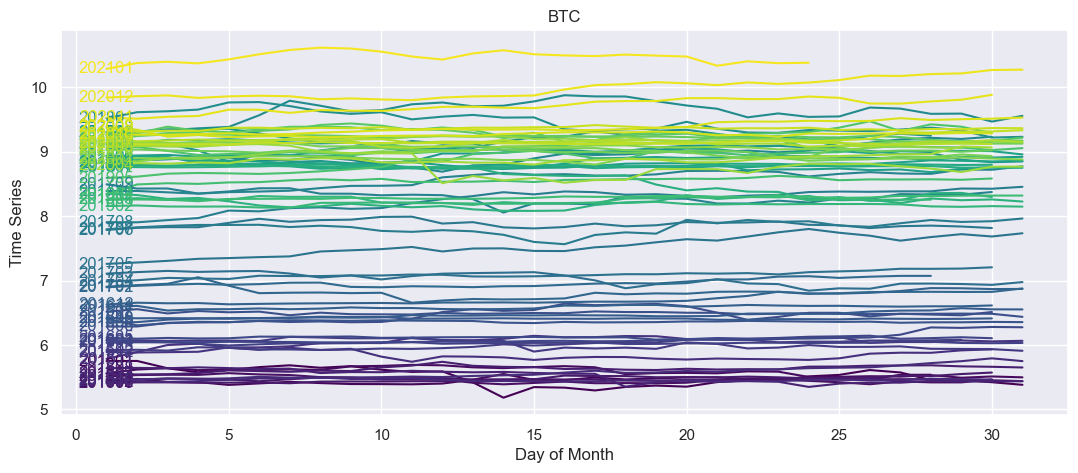

In [21]:
# seasonal plot for train3 with monthly seasonality
ax = plot_seasonal(train3, 'ts', period='month', labels='left', figsize=(13,5))
ax.set(xlabel='Day of Month', ylabel='Time Series', title='BTC')
plt.show()

The monthly seasonality is not strong in the time series.

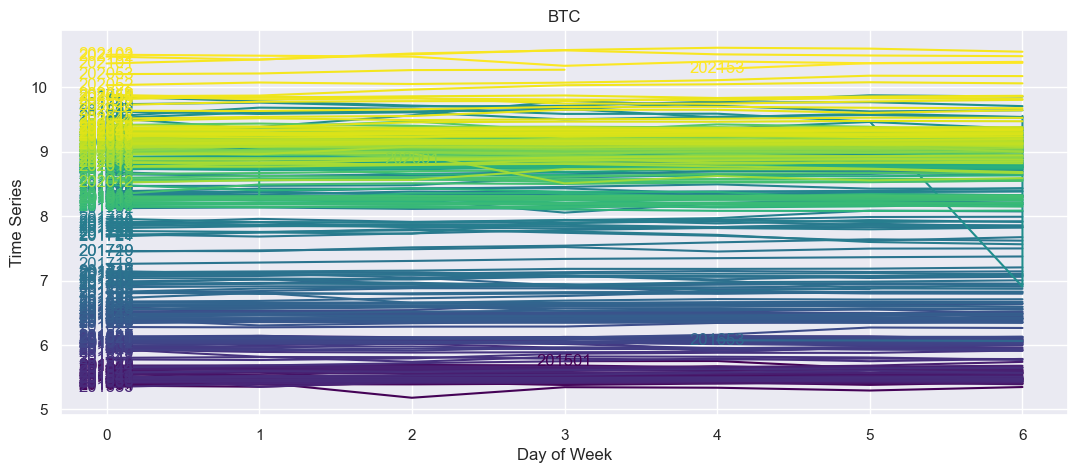

In [22]:
# seasonal plot for train3 with weekly seasonality
ax = plot_seasonal(train3, 'ts', period='week', labels='left', figsize=(13,5))
ax.set(xlabel='Day of Week', ylabel='Time Series', title='BTC')
plt.show()

The weekly seasonality is not strong in the time series.

**Conclusion:** <br>
* `train1` has yearly seasonality. <br>
* `train2` has weekly seasonality. <br>
* `train3` has no significant seasonality.

<a id='c6'></a>
#### **2.2 Seasonal Subseries Plots:**
An alternative plot that emphasises the seasonal patterns is where the data for each season are collected together in separate mini time plots.
This form of plot enables the underlying seasonal pattern to be seen clearly, and also shows the changes in seasonality over time. [[ref]](https://otexts.com/fpp3/subseries.html)

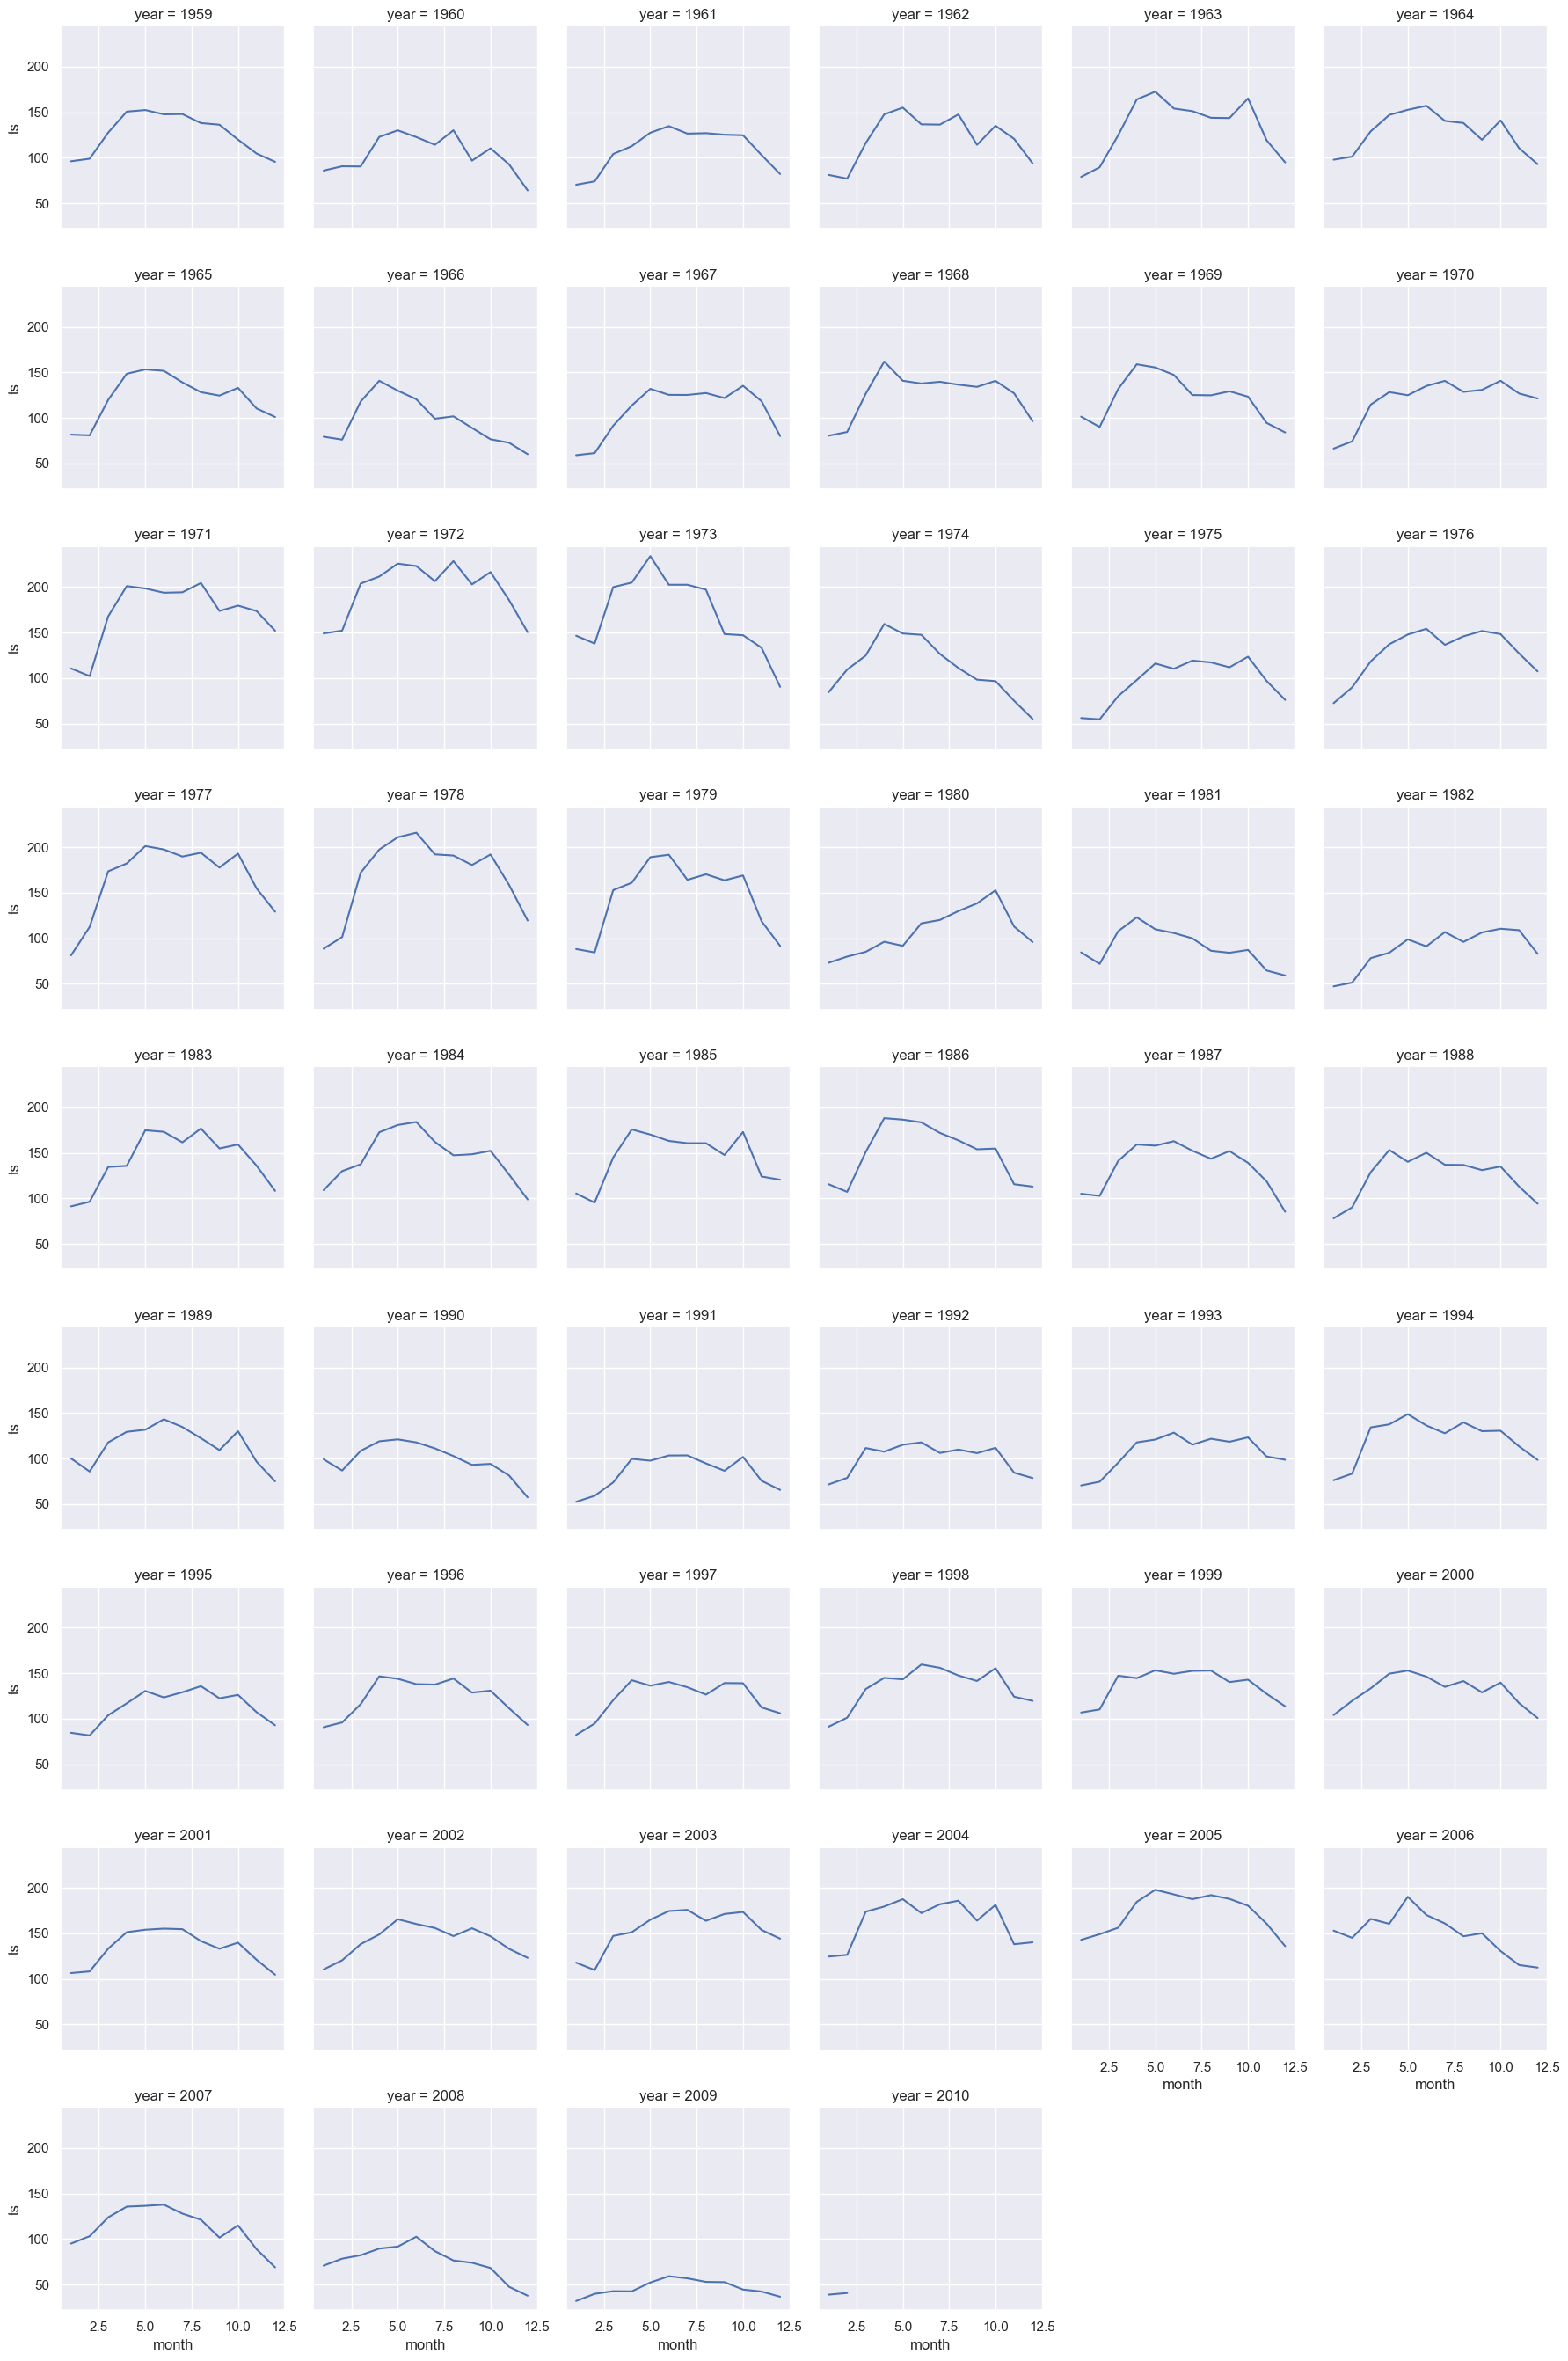

In [23]:
# monthly seasonality for train1
d = train1.assign(year=train1.index.year, month=train1.index.month)
g = sns.FacetGrid(d, col='year', col_wrap=6)
g.map(plt.plot, 'month', 'ts')

The above figures make it evident that there is yearly seasonality in `train1`. <br>
These plots are provided only for `train1` as an example and we do not apply this to other datasets.

<a id='c7'></a>
#### **2.3 Periodogram:**
A periodogram is used to identify the dominant periods (or frequencies) of a time series. This can be a helpful tool for identifying the dominant cyclical behavior in a series, particularly when the cycles are not related to the commonly encountered monthly or quarterly seasonality [[ref]](https://online.stat.psu.edu/stat510/lesson/6/6.1). read more [here](https://online.stat.psu.edu/stat510/lesson/6/6.1).

The periodogram tells you the strength of the frequencies in a time series. Specifically, the value on the y-axis of the graph is (a ** 2 + b ** 2) / 2, where a and b are the coefficients of the sine and cosine at that frequency [[ref]](https://www.kaggle.com/code/ryanholbrook/seasonality).

In [24]:
# define a function to plot periodogram of the time series showing frequency components on the x-axis and the variance explained on the y-axis
def plot_periodogram(ts, detrend='linear', ax=None, fs=12): # fs is the sampling frequency (number of observations per year)
    from scipy.signal import periodogram
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots(figsize=(12, 3))
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

**For `train1`:** Monthly observations >> fs=12

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

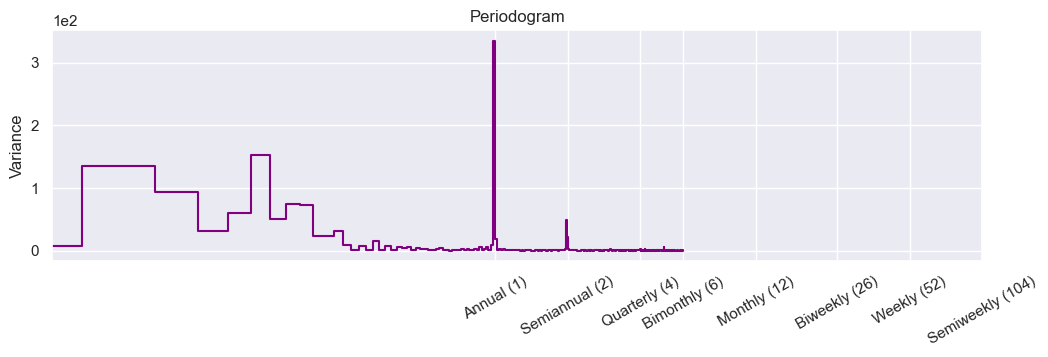

In [25]:
plot_periodogram(train1.ts, detrend='linear', fs=12)

**For `train2`:** Daily observations >> fs=365

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

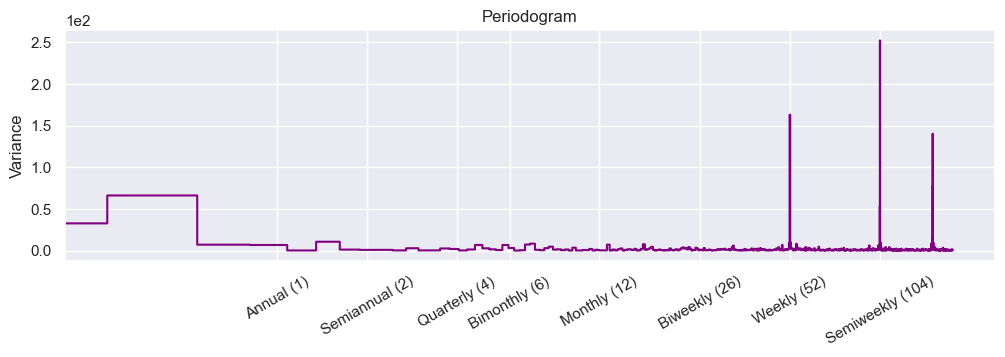

In [26]:
plot_periodogram(train2.ts, detrend='linear', fs=365)

**For `train3`:** Daily observations >> fs=365

<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

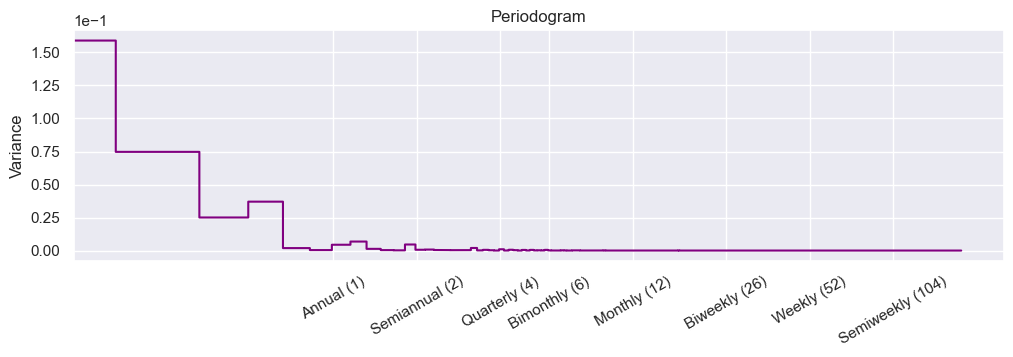

In [27]:
plot_periodogram(train3.ts, detrend='linear', fs=365)

The yearly seasonality in `train1` and weekly seasonality in `train2` are obvious in the above plots. `train3` also does not show a significant seasonality.

<a id='c8'></a>
#### **2.4 Lag Plots:**
Lag plots, which are scatter plots between the time series and its lags, can give us information about the correlation of the variable with its past values.

**Plots for `train1`**

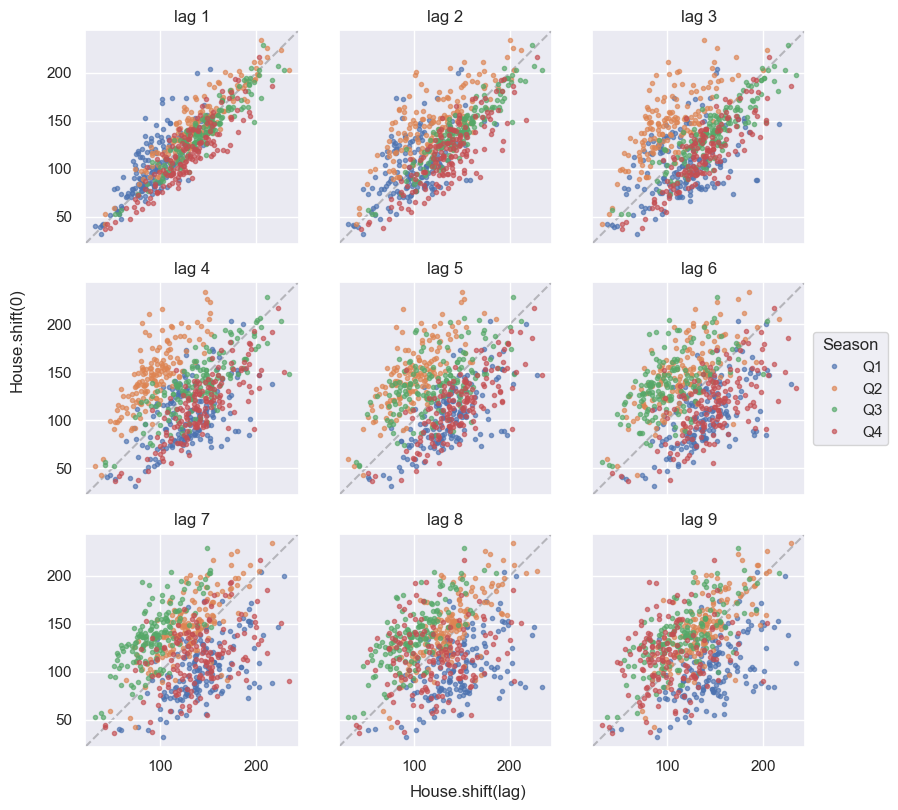

In [177]:
fig, axs = plt.subplots(3, 3, figsize=(9,8), sharex=True, sharey=True)
D = train1.copy()
D = pd.DataFrame({lag: D.ts.shift(lag) for lag in range(10)})
D['q'] = train1.index.quarter
for (i, ax) in enumerate(axs.ravel()):
    for (q, d) in D.groupby('q'):
        ax.plot(d[i+1], d[0], '.', alpha=.66, label=f'Q{q}')
        lim = ax.get_xlim()
    ax.plot(lim, lim, 'k--', alpha=.25, zorder=-10)
    ax.set(xlim=lim, ylim=lim, title=f'lag {i+1}', aspect='equal')
axs.ravel()[5].legend(loc='center left', bbox_to_anchor=[1, .5], title='Season')
fig.text(.5, -.01, 'House.shift(lag)', ha='center', va='bottom')
fig.text(0, .5, 'House.shift(0)', ha='center', va='bottom', rotation=90)
plt.tight_layout()


We can see that there is a considerable positive correlation between time series 1 and its three lags.

**Plots for `train2`**

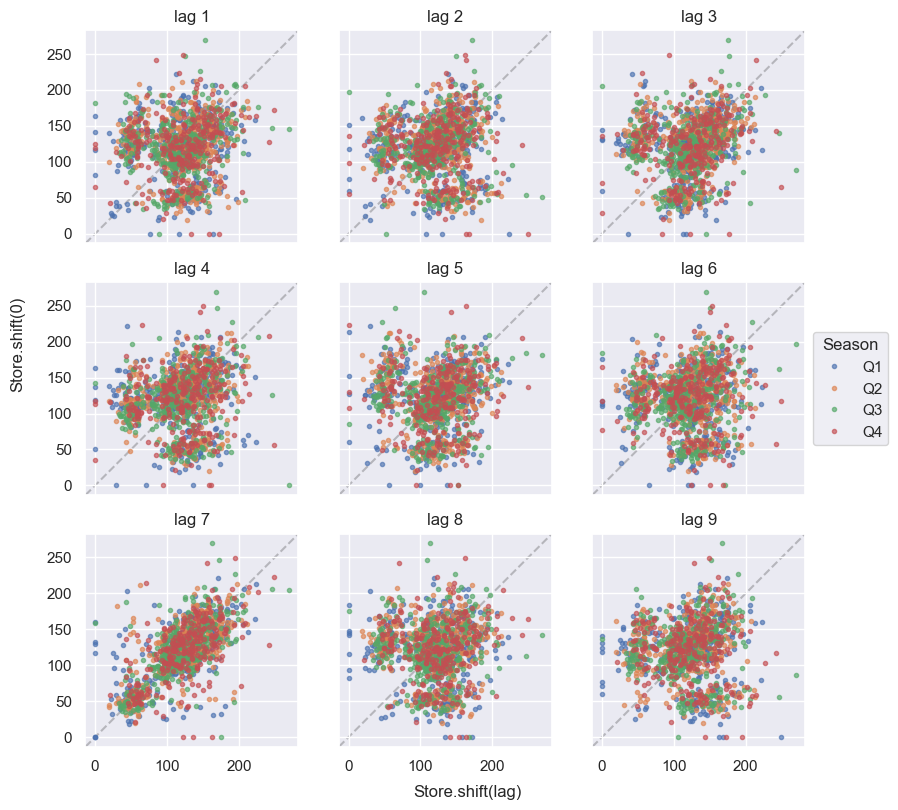

In [178]:
fig, axs = plt.subplots(3, 3, figsize=(9,8), sharex=True, sharey=True)
D = train2.copy()
D = pd.DataFrame({lag: D.ts.shift(lag) for lag in range(10)})
D['q'] = train2.index.quarter
for (i, ax) in enumerate(axs.ravel()):
    for (q, d) in D.groupby('q'):
        ax.plot(d[i+1], d[0], '.', alpha=.66, label=f'Q{q}')
        lim = ax.get_xlim()
    ax.plot(lim, lim, 'k--', alpha=.25, zorder=-10)
    ax.set(xlim=lim, ylim=lim, title=f'lag {i+1}', aspect='equal')
axs.ravel()[5].legend(loc='center left', bbox_to_anchor=[1, .5], title='Season')
fig.text(.5, -.01, 'Store.shift(lag)', ha='center', va='bottom')
fig.text(0, .5, 'Store.shift(0)', ha='center', va='bottom', rotation=90)
plt.tight_layout()


We can find the strongest correlation of time series 2 with its lag 7. This could be guessed considering the weekly pattern in the data.


**Plots for `train3`**

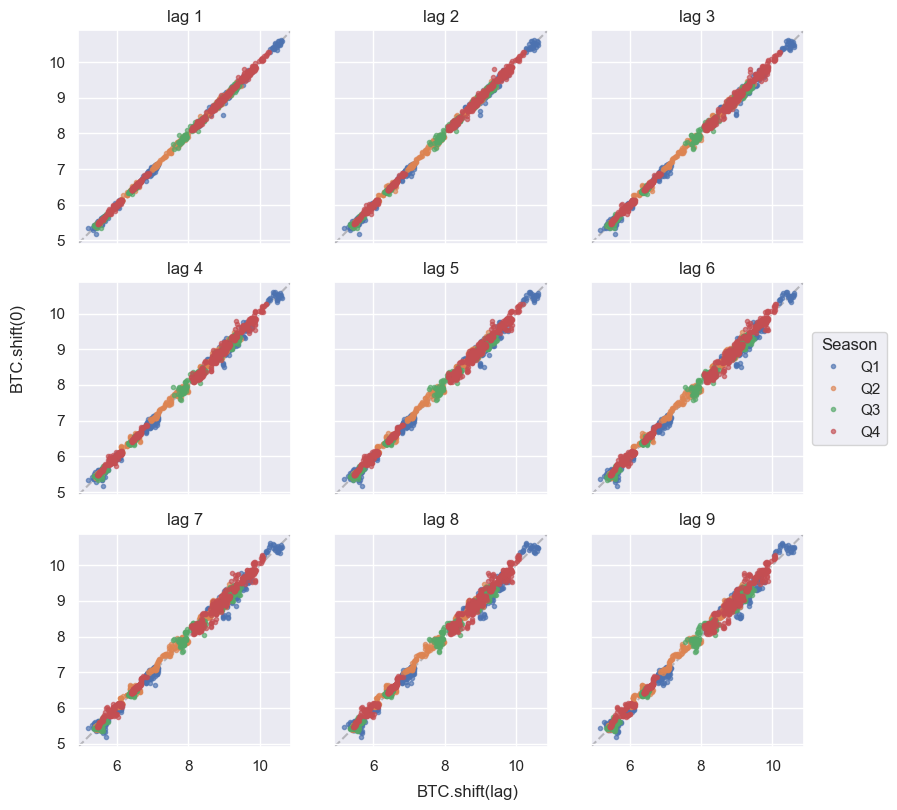

In [179]:
fig, axs = plt.subplots(3, 3, figsize=(9,8), sharex=True, sharey=True)
D = train3.copy()
D = pd.DataFrame({lag: D.ts.shift(lag) for lag in range(10)})
D['q'] = train3.index.quarter
for (i, ax) in enumerate(axs.ravel()):
    for (q, d) in D.groupby('q'):
        ax.plot(d[i+1], d[0], '.', alpha=.66, label=f'Q{q}')
        lim = ax.get_xlim()
    ax.plot(lim, lim, 'k--', alpha=.25, zorder=-10)
    ax.set(xlim=lim, ylim=lim, title=f'lag {i+1}', aspect='equal')
axs.ravel()[5].legend(loc='center left', bbox_to_anchor=[1, .5], title='Season')
fig.text(.5, -.01, 'BTC.shift(lag)', ha='center', va='bottom')
fig.text(0, .5, 'BTC.shift(0)', ha='center', va='bottom', rotation=90)
plt.tight_layout()


We see that the correlations between time series 3 and all its first 9 lags are very strong.

<a id='c9'></a>
#### **2.5 Autocorrelation Plots:**

Just as correlation measures the extent of a linear relationship between two variables, **autocorrelation** measures the linear relationship between lagged values of a time series. The autocorrelation coefficients make up the autocorrelation function or ACF. The plot is sometimes known as a correlogram. [[ref]](https://otexts.com/fpp3/acf.html)<br>
The **partial autocorrelation** tells you the correlation of a lag accounting for all of the previous lags -- the amount of "new" correlation the lag contributes, so to speak. Plotting the partial autocorrelation can help you choose the lags with the most importance. When choosing lags to use as features, it generally won't be useful to include every lag with a large autocorrelation. In many time series, for example, the autocorrelation at lag 2 might result entirely from "decayed" information from lag 1 -- just correlation that's carried over from the previous step. If lag 2 doesn't contain anything new, there would be no reason to include it if we already have lag 1.

**NOTE:** [[ref]](https://otexts.com/fpp3/acf.html)
* When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in value. So the ACF of a trended time series tends to have positive values that slowly decrease as the lags increase. 
* When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal period) than for other lags.
* When data are both trended and seasonal, you see a combination of these effects.
* Time series that show no autocorrelation are called white noise. For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation. For a white noise series, we expect 95% of the spikes in the ACF to lie within ±2/√T where T is the length of the time series. It is common to plot these bounds on a graph of the ACF.

**For `train1`:**

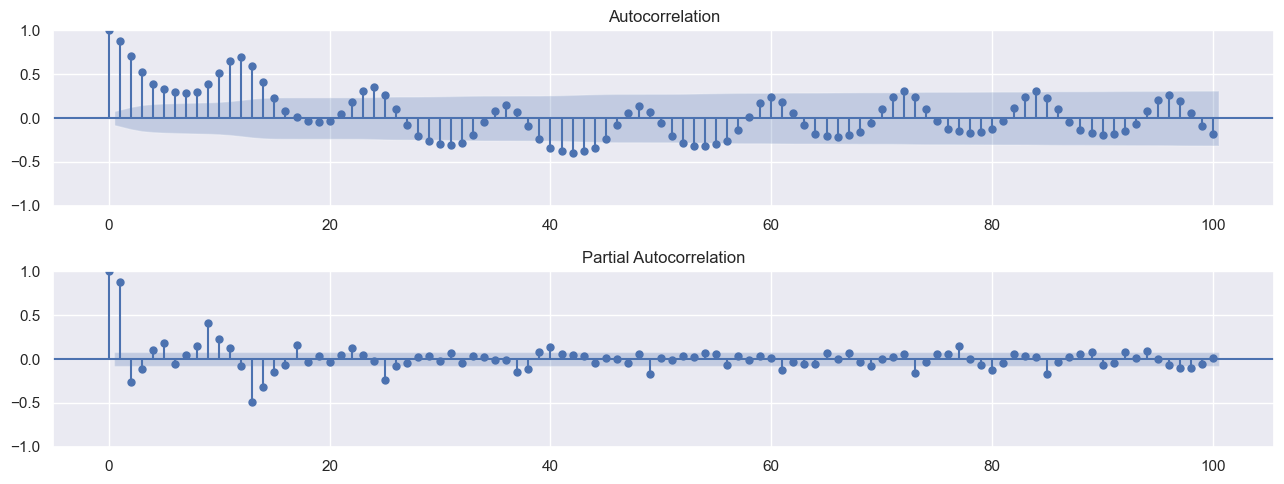

In [29]:
# plot ACF and PACF for train1
fig, axs = plt.subplots(2, 1, figsize=(13, 5))
sm.graphics.tsa.plot_acf(train1.ts, lags=100, ax=axs[0])
sm.graphics.tsa.plot_pacf(train1.ts, lags=100, ax=axs[1])
plt.tight_layout()
plt.show()

The effects of yearly seasonality (patterns in each 12 months) and probably some cyclic patterns in the monthly time series 1 are clear in the above ACP. Moreover, we can see in the PAC plot that the major amount of information is comming from lag 1 (however, we have to remove trend and seasonality from the time series and then evaluate PACF again to make sure).

**For `train2`:**

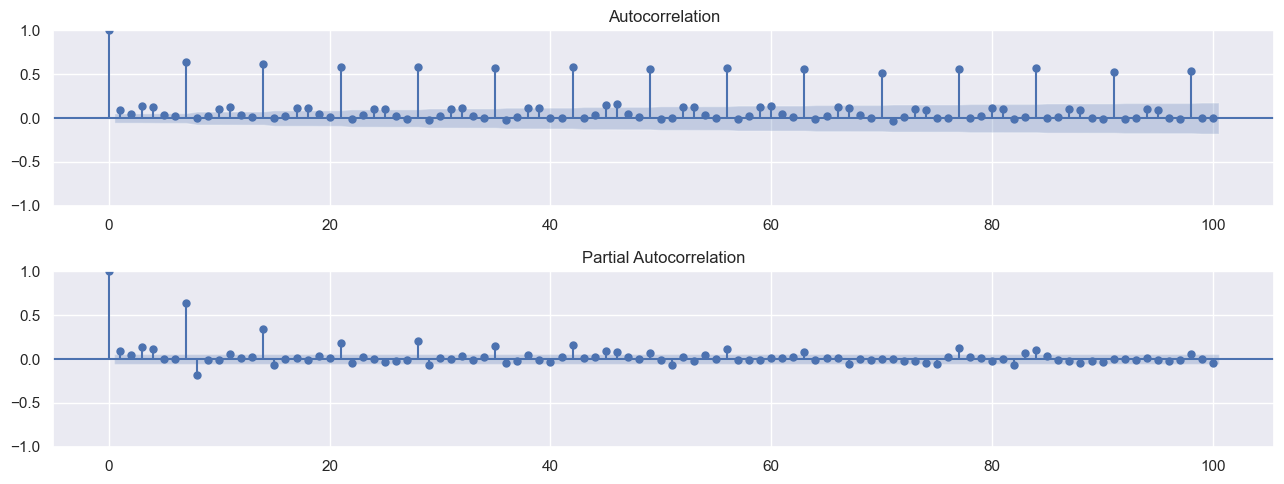

In [30]:
# plot ACF and PACF for train2
fig, axs = plt.subplots(2, 1, figsize=(13, 5))
sm.graphics.tsa.plot_acf(train2.ts, lags=100, ax=axs[0])
sm.graphics.tsa.plot_pacf(train2.ts, lags=100, ax=axs[1])
plt.tight_layout()
plt.show()

Above plot clearly shows the effect of weekly seasonality in the daily time series 2. The amount of new information dropes after lag 7 (however, we have to remove trend and seasonality from the time series and then evaluate PACF again to make sure).

**For `train3`:**

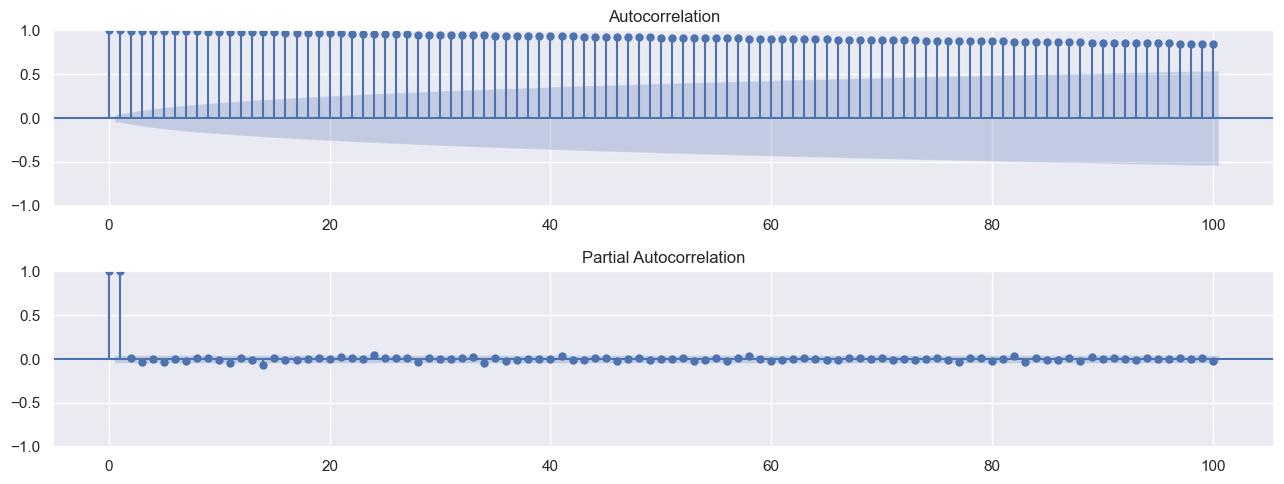

In [31]:
# plot ACF and PACF for train3
fig, axs = plt.subplots(2, 1, figsize=(13, 5))
sm.graphics.tsa.plot_acf(train3.ts, lags=100, ax=axs[0])
sm.graphics.tsa.plot_pacf(train3.ts, lags=100, ax=axs[1])
plt.tight_layout()
plt.show()

We can obviously see the great effect of the strong upward trend in `train3` as the correlations are positive and strong for many first lags. That is why in the previous scatter plots, we recognized very strong correlations for the first 9 lags. However, the major amount of information is comming from lag 1 (however, we have to remove trend from the time series and then evaluate PACF again to make sure).

<a id='c10'></a>
## **3. Time Series Decomposition:**
There are two types of decomposition methods: <br>
**1. Additive decomposition:** The trend-cyclic component, seasonal component, and residual component are sumed up.<br>
**2. Multiplicative decomposition:** The trend-cyclic component, seasonal component, and residual component are multiplied.

The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series. [[ref]](https://otexts.com/fpp3/components.html)

Here, we apply seasonal decomposition using moving averages to the datsets.

**Decomposition for `train1`:**

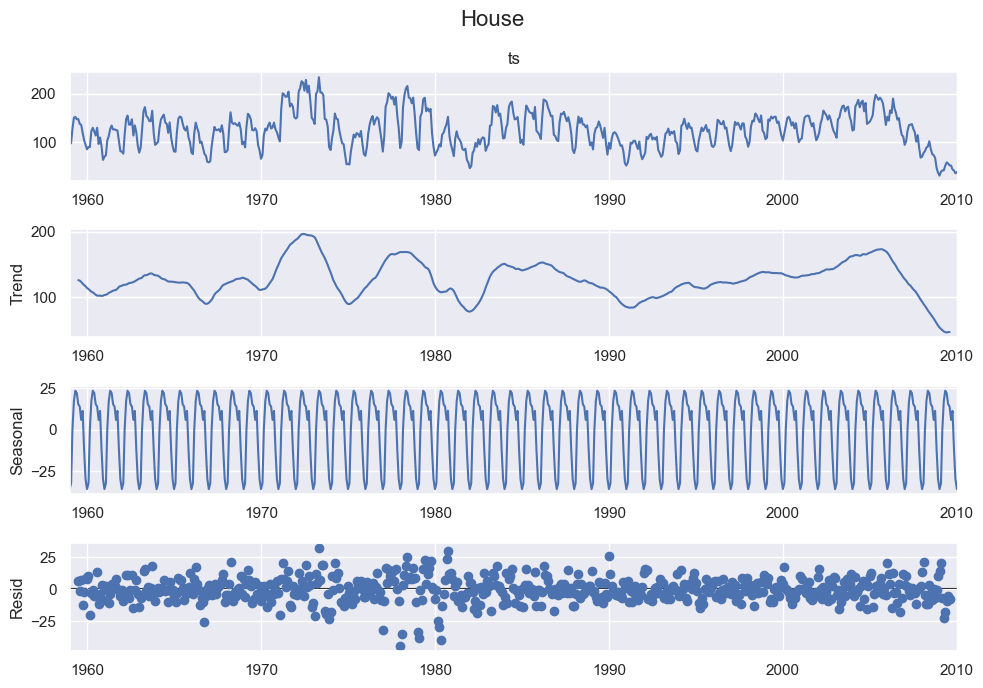

In [229]:
# time series decomposition using statsmodels
fit1 = sm.tsa.seasonal_decompose(train1.ts, model='additive', period=12) # monthly seasonality >> period=12
# plotting the decomposition results
fit1.plot().set_size_inches(10,7)
plt.suptitle('House', fontsize=16)
plt.tight_layout()
plt.show()


As can be seen, the Trend (which is in fact trend-cyclic patterns) plot is more indicative of cyclic patterns than a trend. So, the trend is not significant. The above graph also shows a stable monthly seasonality. However, the magnitude of the noise (residuals) is relatively large, especially at the end of 1970s. <br>

Let's take a look at the decomposed patterns from the first 100 data points.

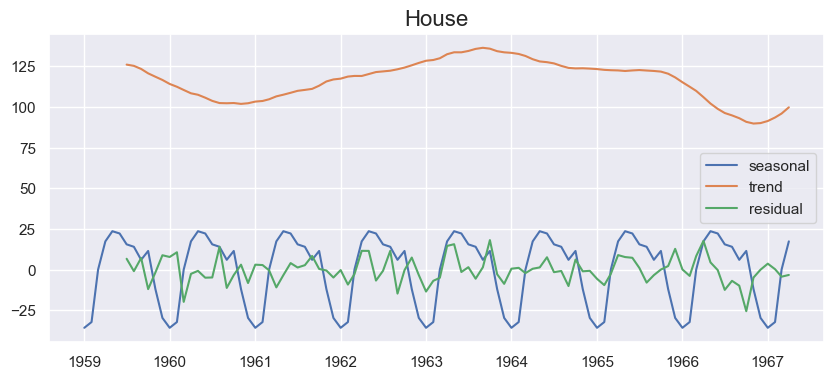

In [230]:
# plot fit for first 100 observations
plt.figure(figsize=(10,4))
plt.plot(fit1.seasonal[:100], label='seasonal')
plt.plot(fit1.trend[:100], label='trend')
plt.plot(fit1.resid[:100], label='residual')
plt.title('House', fontsize=16)
plt.legend()
plt.show()

Here, we can better see the scales of each pattern and also compare the monthly seasonality with the residuals.

**Decomposition for `train2`:**

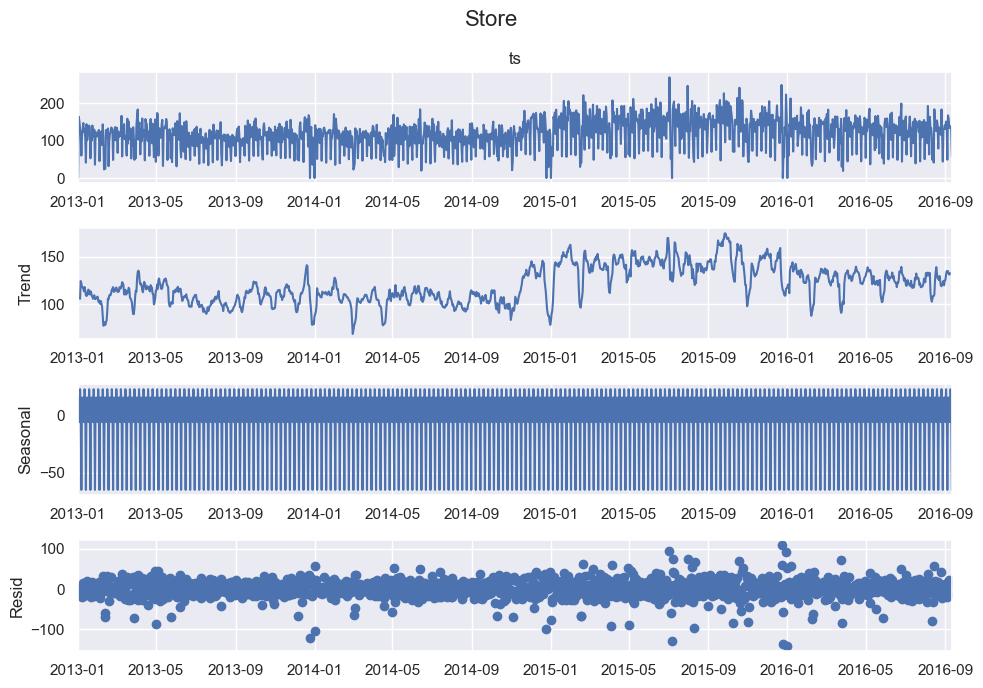

In [231]:
# time series decomposition using statsmodels
fit2 = sm.tsa.seasonal_decompose(train2.ts, model='additive', period=7) # weekly seasonality >> period=7
# plotting the decomposition results
fit2.plot().set_size_inches(10,7)
plt.suptitle('Store', fontsize=16)
plt.tight_layout()
plt.show()

The above plots show a small upward trend and many cyclic patterns. The magnitude of the residuals seems to be significant compared to the weekly seasonality of the data.

Let's take a look at the decomposed patterns from the first 100 data points.

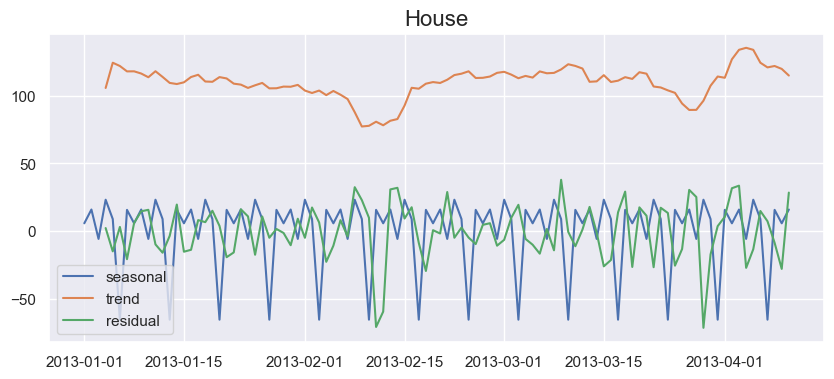

In [232]:
# plot fit for first 100 observations
plt.figure(figsize=(10,4))
plt.plot(fit2.seasonal[:100], label='seasonal')
plt.plot(fit2.trend[:100], label='trend')
plt.plot(fit2.resid[:100], label='residual')
plt.title('House', fontsize=16)
plt.legend()
plt.show()

Here, we can better see some large residual values.

**Decomposition for `train3`:**

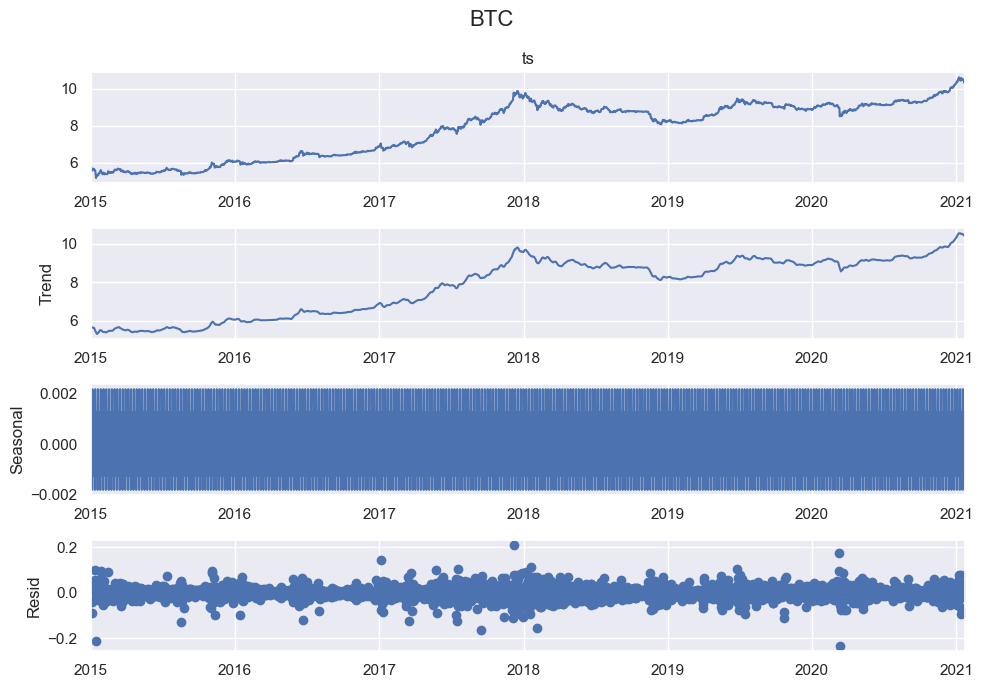

In [233]:
# time series decomposition using statsmodels
fit3 = sm.tsa.seasonal_decompose(train3.ts, model='additive') # we don't know the seasonality
# plotting the decomposition results
fit3.plot().set_size_inches(10,7)
plt.suptitle('BTC', fontsize=16)
plt.tight_layout()
plt.show()


The data has an obvious positive trend. Take a look at the magnitude of the seasonal patterns. It shows that the seasonality is not significant at all. On the other hand, the residuals are small compared to the trend.

Let's take a look at the decomposed patterns from the first 100 data points. 
Note: Since the magnitude of the trend is much larger than the other patterns and plotting them all in one figure may not be indicative, we only plot the seasonality and residuals.

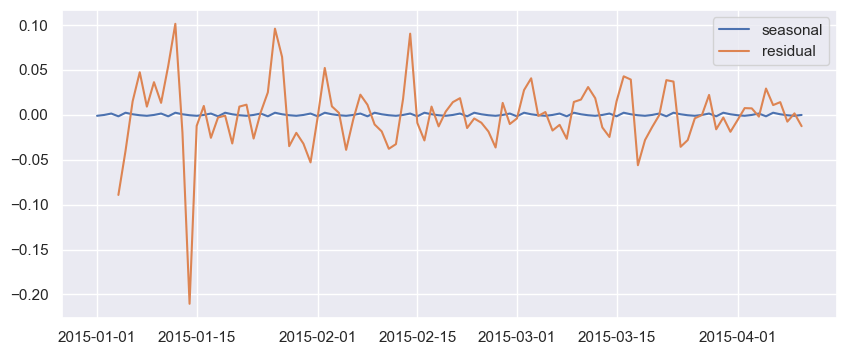

In [235]:
# plot fit for first 100 observations
plt.figure(figsize=(10,4))
plt.plot(fit3.seasonal[:100], label='seasonal')
plt.plot(fit3.resid[:100], label='residual')
plt.legend()
plt.show()

The above plot clearly proves that there is no significant seasonality in the data. 

<a id='c11'></a>
## **4. Classical Decomposition:**
Classical decomposition is a relatively simple procedure, and forms the starting point for most other methods of time series decomposition. There are two forms of classical decomposition: an additive decomposition and a multiplicative decomposition [[ref]](https://otexts.com/fpp3/classical-decomposition.html). **It is the same as what `sm.tsa.seasonal_decompose` did in the pervious section.** The calssical decomposition includes 4 steps as follows:
1. Extracting trend-cycle pattern based on moving averages
2. Calculate the detrended series
3. Estimate the seasonal component for each season
4. Calculate the remainder component

In the following, we only investigate the application of moving averages. We implement the whole procedure of classical decomposition in another notebook (`forecasting_models_1.ipynb`).
#### **Trend-cycle pattern based on moving averages:**
The first step in a classical decomposition is to use a moving average method to estimate the trend-cycle. The estimate of the trend-cycle at time t is obtained by averaging values of the time series within k periods of t (in the form of a sliding window). Observations that are nearby in time are also likely to be close in value. Therefore, the average eliminates some of the randomness in the data, leaving a smooth trend-cycle component. [[ref]](https://otexts.com/fpp3/moving-averages.html)


**Note1:** The order of the moving average determines the smoothness of the trend-cycle estimate. In general, a larger order means a smoother curve. An order greater than the largest seasonality in the data can be a good choice.

**Note2:**  if the seasonal period is **even** and of order m, we use a 2 × m-MA to estimate the trend-cycle. If the seasonal period is **odd** and of order m, we use a m-MA to estimate the trend-cycle. This make an even-order moving average symmetric. (Read more [here](https://otexts.com/fpp3/moving-averages.html))

**For `train1`:**

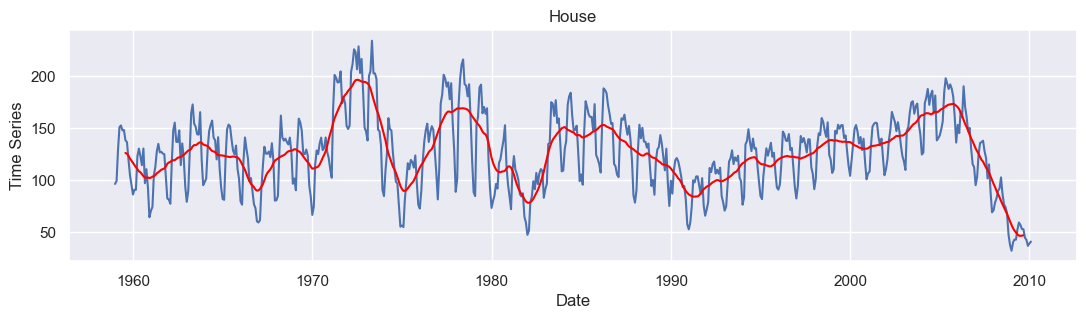

In [258]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(train1.ts)
# based on Note2 above and the even seasonality
ax.plot(train1.ts.rolling(window=12, center=True).mean().rolling(window=2, center=True).mean(), color='red')
ax.set(ylabel='Time Series', xlabel='Date', title='House')
plt.show()

Notice that the trend-cycle is smoother than the original data and captures the main movement of the time series without all of the minor fluctuations.

Let's try some other values for the order.

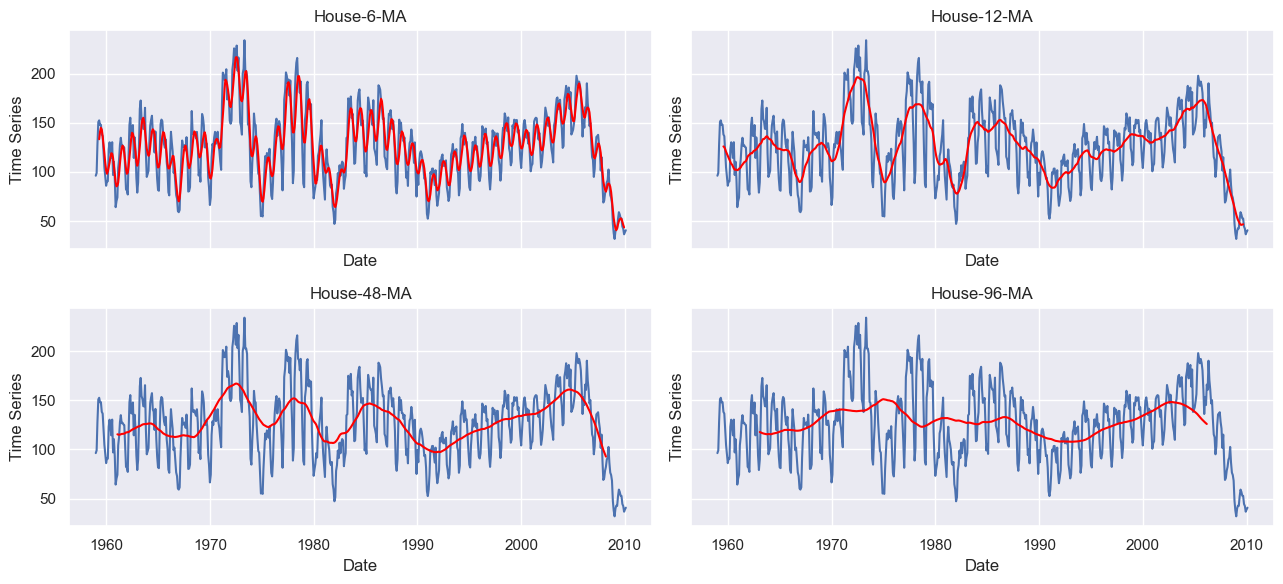

In [259]:
fig, axs = plt.subplots(2, 2, figsize=(13,6), sharex=True, sharey=True)
rolls = 6, 12, 48, 96 # different rolling windows sizes (moving average orders)
for (ax, roll) in zip(axs.ravel(), rolls):
    ax.plot(train1.ts)
    ax.plot(train1.ts.rolling(roll, center=True).mean().rolling(2, center=True).mean(), color='red')
    ax.set(ylabel='Time Series', title=f'House-{roll}-MA', xlabel='Date')
plt.tight_layout()

We see that how the trend is smoothed by choosing larger windows. If the sliding window is too small, trend curve has seasonal fluctuations.

**For `train2`:**

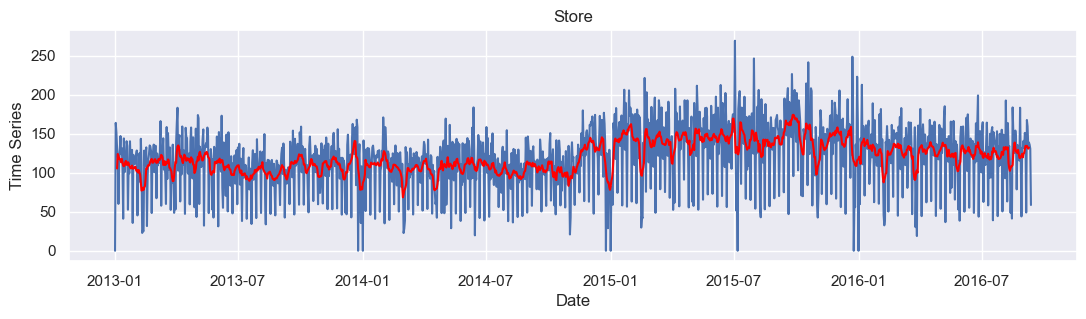

In [246]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(train2.ts)
ax.plot(train2.ts.rolling(window=7, center=True).mean(), color='red') # moving average with window=7
ax.set(ylabel='Time Series', xlabel='Date', title='Store')
plt.show()

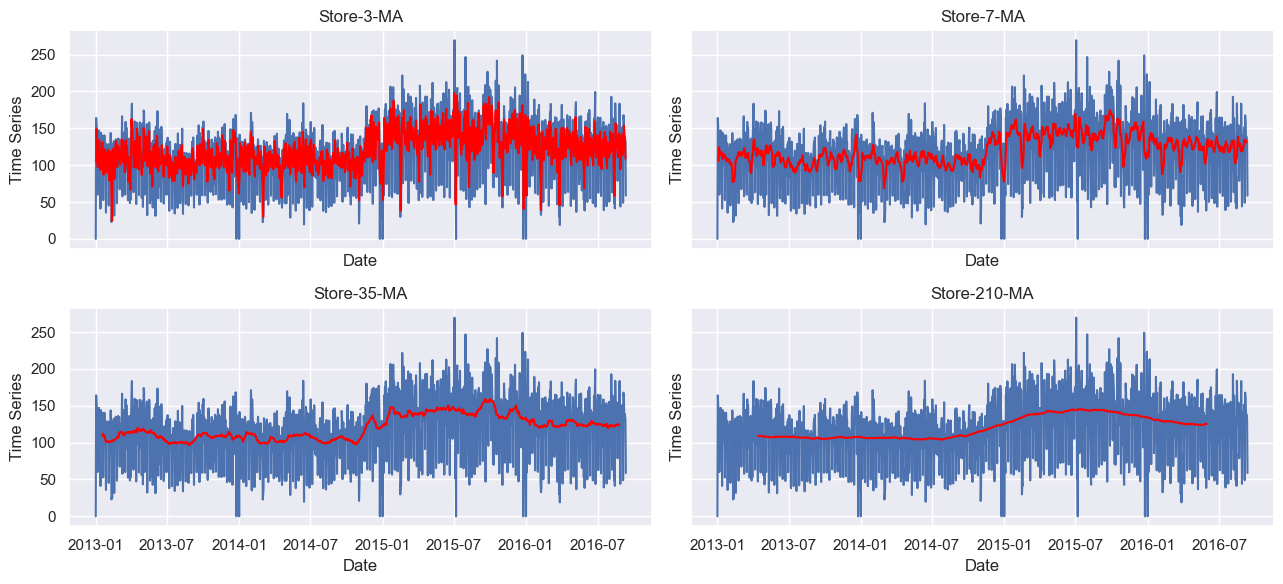

In [252]:
fig, axs = plt.subplots(2, 2, figsize=(13,6), sharex=True, sharey=True)
rolls = 3, 7, 7*5, 7*30 # different rolling windows sizes (moving average orders)
for (ax, roll) in zip(axs.ravel(), rolls):
    ax.plot(train2.ts)
    ax.plot(train2.ts.rolling(roll, center=True).mean(), color='red')
    ax.set(ylabel='Time Series', title=f'Store-{roll}-MA', xlabel='Date')
plt.tight_layout()

We now can better see that from Q1 of 2013 to Q3 of 2914, the trend is zero. After that and until the begining of Q3 2015, there is a positive trend. Then, the trend is almost downward until the begining of Q3 2016. After that, the trend is zero again.

**For `train3`:**

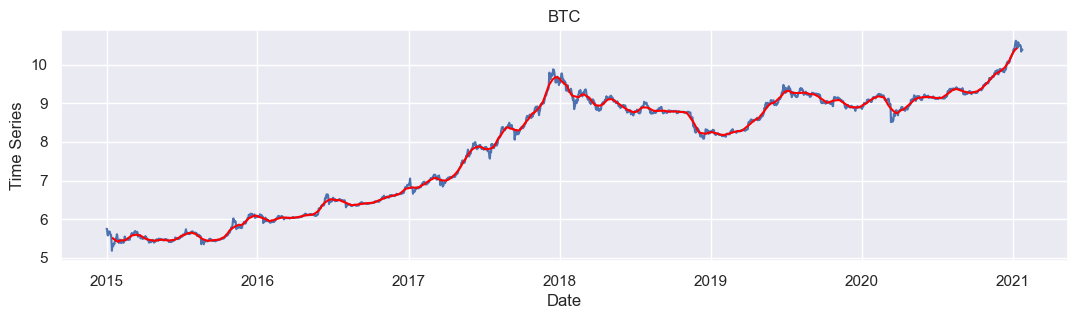

In [256]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(train3.ts)
ax.plot(train3.ts.rolling(window=30, center=True).mean(), color='red') # moving average with window=30
ax.set(ylabel='Time Series', xlabel='Date', title='BTC')
plt.show()

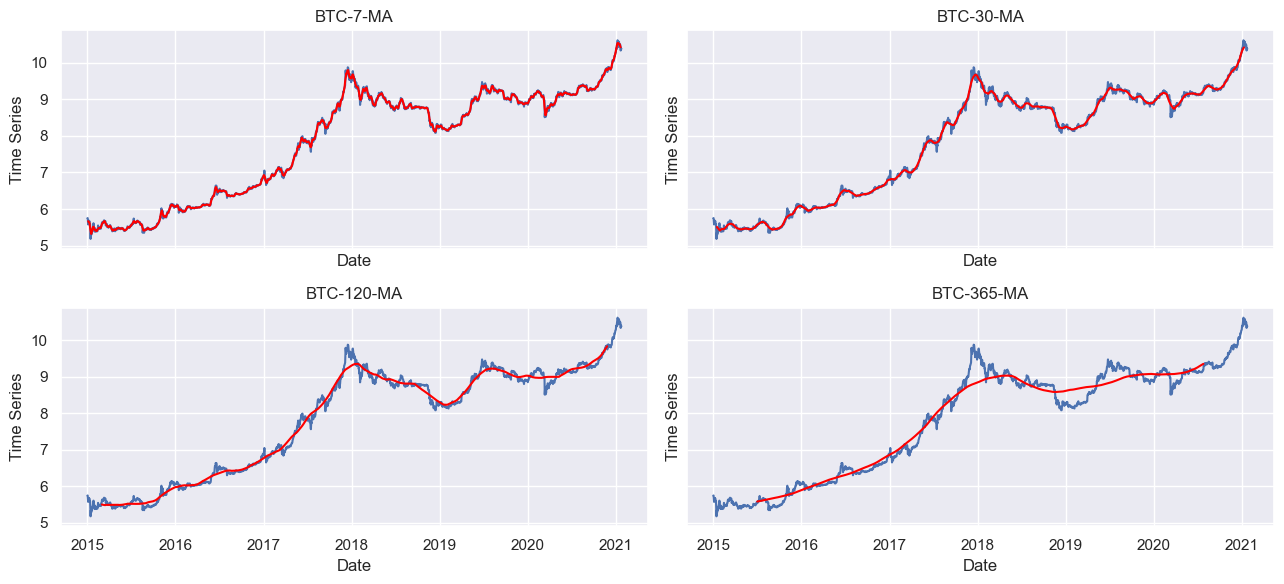

In [257]:
fig, axs = plt.subplots(2, 2, figsize=(13,6), sharex=True, sharey=True)
rolls = 7, 30, 120, 365 # different rolling windows sizes (moving average orders)
for (ax, roll) in zip(axs.ravel(), rolls):
    ax.plot(train3.ts)
    ax.plot(train3.ts.rolling(roll, center=True).mean(), color='red')
    ax.set(ylabel='Time Series', title=f'BTC-{roll}-MA', xlabel='Date')
plt.tight_layout()

The trend is highly positive until 2018. After that, the trend is negative for one year. With the start of 2019, the trend is almost upward.

##### **Disadvantages of Classical Decomposition:**
Some of the problems with classical decomposition are as follows:
* The estimate of the trend-cycle is unavailable for the first few and last few observations. 
* Classical decomposition methods assume that the seasonal component repeats from year to year.
* Read more [here](https://otexts.com/fpp3/classical-decomposition.html).

**Note:** Read about the SEATS and X-11 methods used by official statistics agencies [here](https://otexts.com/fpp3/methods-used-by-official-statistics-agencies.html).

<a id='c12'></a>
## **5. STL Decomposition:**
STL is a versatile and robust method for decomposing time series. STL is an acronym for “Seasonal and Trend decomposition using Loess”, while loess is a method for estimating nonlinear relationships. STL has some advantages like:
* Handling seasonalities with any time resolution.
* Handling seasonal components that change over time.
* User-defined smoothness of the trend-cycle.
* Robustness to outliers.

Read more about STL [here](https://otexts.com/fpp3/stl.html).

#### **5.1 Time Series Decomposition:**
Here, we decompose time series based on STL method.

**STL for `train1`:**

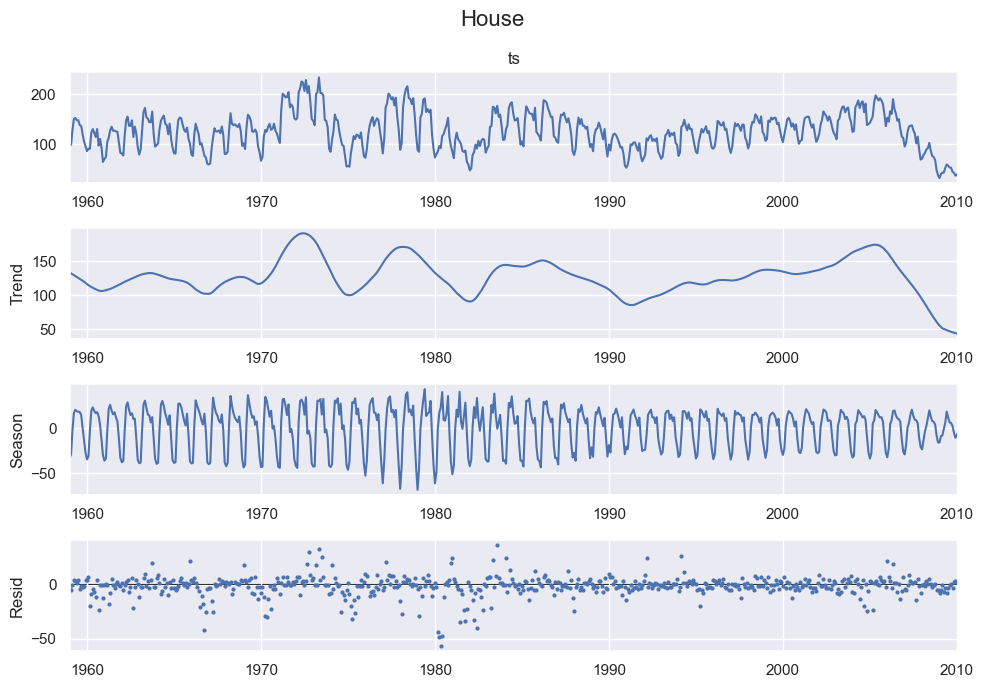

In [279]:
fit = sm.tsa.STL(train1.ts, robust=True).fit()
fig = fit.plot()
fig.set_size_inches(10,7)
# change marker size for last plot (residuals)
fig.axes[-1].lines[0].set_markersize(2)
plt.suptitle('House', fontsize=16)
plt.tight_layout()
plt.show()

By comparing the above plots with the plots obtained by `sm.tsa.seasonal_decompose` using moving averages, we can see that the STL method supports changes in the seasonal pattern.

**STL for `train2`:**

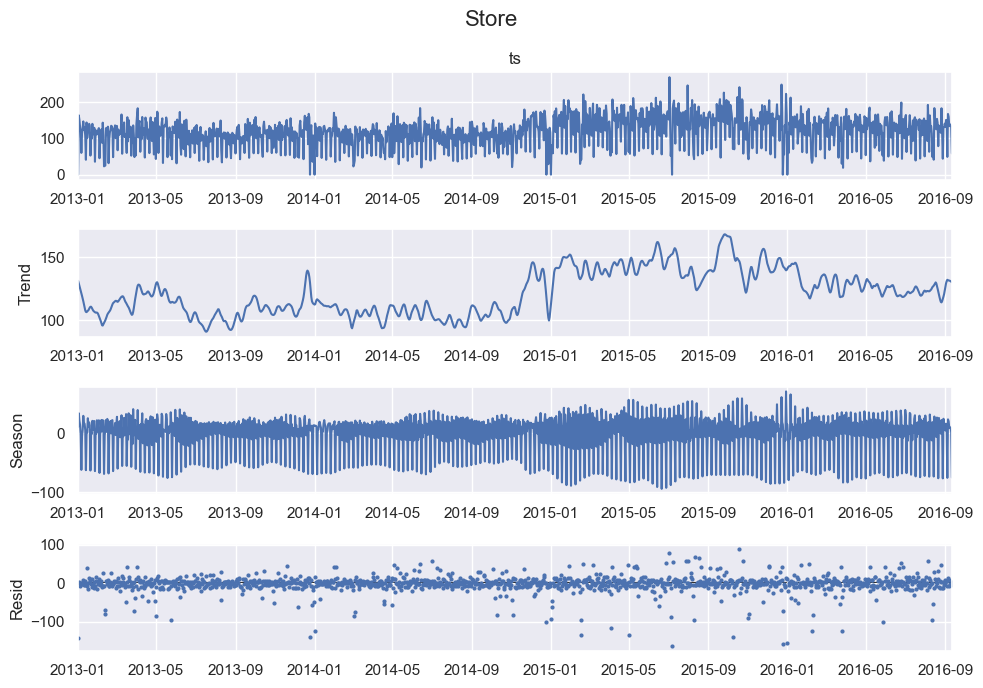

In [280]:
fit = sm.tsa.STL(train2.ts, robust=True).fit()
fig = fit.plot()
fig.set_size_inches(10,7)
# change marker size for last plot (residuals)
fig.axes[-1].lines[0].set_markersize(2)
plt.suptitle('Store', fontsize=16)
plt.tight_layout()
plt.show()

Similar to `train1`, the STL method on `train2` resulted in a seasonal pattern that changes over time.

**STL for `train3`:**

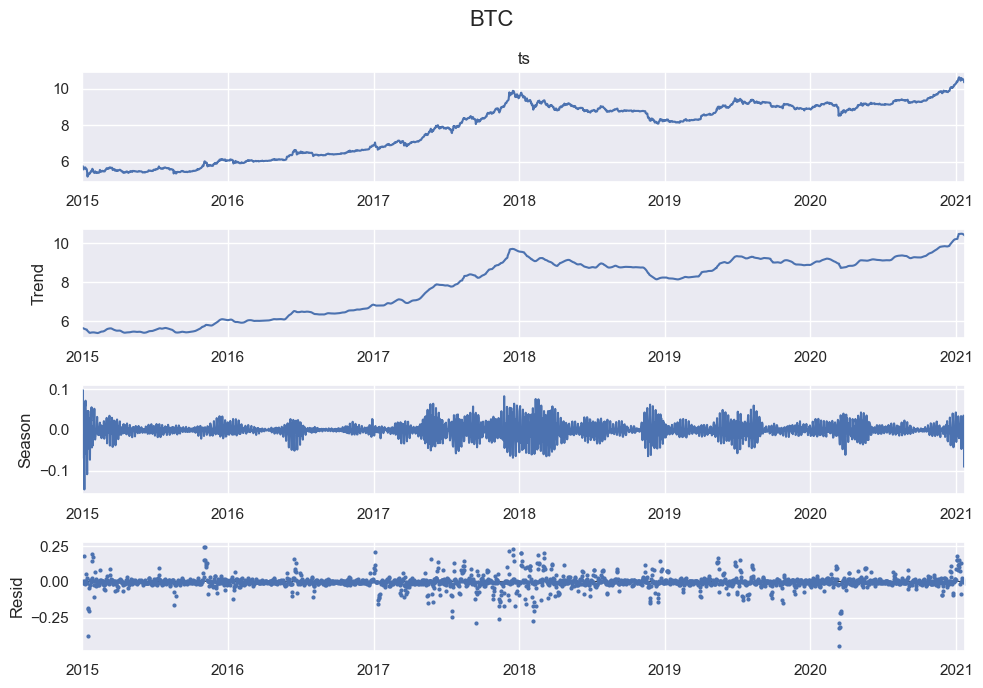

In [281]:
fit = sm.tsa.STL(train3.ts, robust=True).fit()
fig = fit.plot()
fig.set_size_inches(10,7)
# change marker size for last plot (residuals)
fig.axes[-1].lines[0].set_markersize(2)
plt.suptitle('BTC', fontsize=16)
plt.tight_layout()
plt.show()

In the above figure, we can see that, like before, the seasonal component is very small and hence insignificant.

<a id='c13'></a>
#### **5.2 Trend and Seasonality Strengths:**
These are measures of the strength of the trend and seasonality with a value between 0 and 1, higher shows more strength. These measures can be useful, for example, when you have a large collection of time series, and you need to find the series with the most trend or the most seasonality. Read more [here](https://otexts.com/fpp3/stlfeatures.html).

In [290]:
# define a function to compute the trend and seasonality strengths
def STL_features(series):
    stl = sm.tsa.STL(series, robust=True).fit()
    detrended_series = series - stl.trend
    deseaonlized_series = series - stl.seasonal

    """"calculating the detrended and deseasonalized series"""
    stl_detrended = sm.tsa.STL(detrended_series, robust=True).fit()
    stl_deseasonalized = sm.tsa.STL(deseaonlized_series, robust=True).fit()

    """"calculating the trend and seasonality strengths"""
    trend_strength = max(0, (1 - (stl_deseasonalized.resid.var() / (stl_deseasonalized.resid + stl_deseasonalized.trend).var()))),
    season_strength = max(0, (1 - (stl_detrended.resid.var() / (stl_detrended.resid + stl_detrended.seasonal).var()))),
    
    print(f'trend_strength = {trend_strength}, season_strength = {season_strength}')

In [291]:
# checking the STL features for the three time series
print('For train1:')
STL_features(train1.ts)
print('For train2:')
STL_features(train2.ts)
print('For train3:')
STL_features(train3.ts)

For train1:
trend_strength = (0.8905145333800104,), season_strength = (0.8698643535255232,)
For train2:
trend_strength = (0.3581825238792731,), season_strength = (0.6379894480712525,)
For train3:
trend_strength = (0.9988751130487032,), season_strength = (9.287239116040347e-05,)


As can be expected, the trend strength is higher in `train3` while its seasonal strength is almost zero. `train1` has also the highest seasonal strength.

Some more features can also be defined and extracted from a time series which are described [here](https://otexts.com/fpp3/exploring-australian-tourism-data.html). 

#### **Saving Datasets:**

In [293]:
train1.to_csv('train1.csv')
train2.to_csv('train2.csv')
train3.to_csv('train3.csv')
test1.to_csv('test1.csv')
test2.to_csv('test2.csv')
test3.to_csv('test3.csv')